<a href="https://colab.research.google.com/github/QuocThanh26/The-film-product-ticket-portfolio/blob/main/Project%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load Data**

In [ ]:
# Import một số thư viện quan trọng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',None) # truy xuất hết nội dung trong cột
pd.set_option('display.max_columns',None) # truy xuất hết các cột trong dataframe

In [ ]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data/movie_ticket_data/movie_ticket_data/customer.csv')
df_campaign = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data/movie_ticket_data/movie_ticket_data/campaign.csv')
df_device = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data/movie_ticket_data/movie_ticket_data/device_detail.csv')
df_status = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data/movie_ticket_data/movie_ticket_data/status_detail.csv')
df_ticket = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Data/movie_ticket_data/movie_ticket_data/ticket_history.csv')

# **2. Data Cleaning**

## **2.1 data type, NULL values, Duplicate values**

In [ ]:
# Bảng Customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
df_customer.head(2)

customer_id usergender        dob
0       100032     Female   8/8/1985
1       100046       Male  7/11/1987

In [ ]:
# chuyển đổi data type dob từ object thành datetime
from datetime import datetime # sử dụng module datetime trong Python có sẵn trong Python
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [ ]:
df_customer.info() # => data type xong, Null values df_customer không có nên kiểm tra đến duplicate values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  131400 non-null  int64         
 1   usergender   131400 non-null  object        
 2   dob          131400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ MB


In [ ]:
df_customer['customer_id'].nunique() # => bảng này không bị trùng xong bảng customer

131400

In [ ]:
# Bảng campaign
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
df_campaign.head(2)

campaign_id    campaign_type
0       106460  direct discount
1        30040  direct discount

In [ ]:
df_campaign['campaign_id'].nunique()

216

In [ ]:
# Bảng device
df_device.info()
# => ta thấy bảng device của ta có 139902 dòng dữ liệu, column device_number có 139901 còn model có 132763 data
# => như vậy bảng device của ta có một số lượng bị Null
# => Khi data bị Null ta phải kiểm tra Null bao nhiêu % trong tổng số dữ liệu của column trước khi xử lý: xóa đi or thay thế nó

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [ ]:
# tạo function calculate số dòng Null và tỷ lệ % của từng column
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)


In [ ]:
calc_null_rate(df_device)
# => model bị null 7139 dữ liệu khoảng 5% nên ta thay thế số lượng bị null này thành unknown vẫn giữ để có thể đo lường, đánh giá
# => còn device_number null 1 dữ liệu ta xóa vì nó không ảnh hưởng

null_count  null_rate
model                7139   0.051029
device_number           1   0.000007
platform                0   0.000000

In [ ]:
# thay thế Null trong model thành 'unknown' ,NA: Not Available
df_device = df_device.fillna({'model' : 'unknown'})
# xóa giá trị Null trong cột device_number
df_device = df_device[df_device['device_number'].notna()]

In [ ]:
calc_null_rate(df_device)

null_count  null_rate
device_number           0        0.0
model                   0        0.0
platform                0        0.0

In [ ]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139901 entries, 0 to 139900
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          139901 non-null  object
 2   platform       139901 non-null  object
dtypes: object(3)
memory usage: 4.3+ MB


In [ ]:
# bảng status
df_status.head(10)

status_id  \
0          1   
1         -1   
2         -2   
3         -3   
4         -4   
5         -5   
6         -6   
7         -7   

                                                                                    description  \
0                                                                              Order successful   
1                                                                               Payment overdue   
2  Insufficient funds in customer account. Please add more funds and try the transaction again.   
3                                                                    No response from your bank   
4         Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   
5                                                                      Payment failed from bank   
6                                                          Need verify your account to continue   
7                                                               Transaction temporarily limited   

  error_group  
0         NaN  
1    customer  
2    customer  
3    external  
4    customer  
5    external  
6    customer  
7    internal

In [ ]:
# bảng ticket
df_ticket.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                     time  status_id  campaign_id  \
0         7.80  2022-07-08 17:46:36.145          1        83330   
1         7.18  2022-07-15 20:44:09.952          1        83330   

               movie_name  
0  Thor: Love And Thunder  
1  Thor: Love And Thunder

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [ ]:
# thay đổi data type của cột time
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154827 non-null  object        
 1   customer_id     154827 non-null  int64         
 2   paying_method   154827 non-null  object        
 3   theater_name    154827 non-null  float64       
 4   device_number   154827 non-null  object        
 5   original_price  154827 non-null  float64       
 6   discount_value  154827 non-null  float64       
 7   final_price     154827 non-null  float64       
 8   time            154827 non-null  datetime64[ns]
 9   status_id       154827 non-null  int64         
 10  campaign_id     154827 non-null  int64         
 11  movie_name      154827 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 14.2+ MB


In [ ]:
calc_null_rate(df_ticket)

null_count  null_rate
ticket_id                0        0.0
customer_id              0        0.0
paying_method            0        0.0
theater_name             0        0.0
device_number            0        0.0
original_price           0        0.0
discount_value           0        0.0
final_price              0        0.0
time                     0        0.0
status_id                0        0.0
campaign_id              0        0.0
movie_name               0        0.0

In [ ]:
df_ticket['ticket_id'].nunique()

154725

In [ ]:
154827 - 154725 #mình có 102 dữ liệu trùng
# => kiểm tra dữ liệu duplicate

102

In [ ]:
df_dup = df_ticket[df_ticket.duplicated(keep = False)]
# keep là giữ nguyên bản sao
#keep : {'first', 'last', False}, mặc định là first
  ##first: Đánh dấu bản sao là True trừ lần xuất hiện đầu tiên. (nghĩa là truy xuất ra)
  ##last: Đánh dấu bản sao là True trừ lần xuất hiện cuối cùng.
  ##False: Đánh dấu tất cả bản sao là True. (nghĩa là truy xuất tất cả các dòng bị trùng)

In [ ]:
df_dup.head(10)
#=> kiểm tra các dòng trùng thực sự

ticket_id  customer_id paying_method  \
3555   c56e3eb9fb1fd241c9de7a700d7a52d2       206709  money in app   
3556   c56e3eb9fb1fd241c9de7a700d7a52d2       206709  money in app   
49730  763e20c9c1136c5c06d9a960fac9dae6       174180   credit card   
49731  763e20c9c1136c5c06d9a960fac9dae6       174180   credit card   
49876  257d0a0e6a7f38b90b5ecdfa9e8416b9       133912  money in app   
49877  257d0a0e6a7f38b90b5ecdfa9e8416b9       133912  money in app   
50202  6dec59a668243f07301d5bf3c2368fa0       111474    debit card   
50203  6dec59a668243f07301d5bf3c2368fa0       111474    debit card   
50212  5f377be63fca730d5b5d12e06ac3f05d       117355   credit card   
50213  5f377be63fca730d5b5d12e06ac3f05d       117355   credit card   

       theater_name                     device_number  original_price  \
3555            5.0  291f6a5c77b7d98a86fe76bdbabe94eb            5.77   
3556            5.0  291f6a5c77b7d98a86fe76bdbabe94eb            5.77   
49730          29.0  ba5794fca2cba47fd0141dd3fb195934            7.42   
49731          29.0  ba5794fca2cba47fd0141dd3fb195934            7.42   
49876         119.0  18abc497c03f7e6bd0b0cf72a89fb911            7.42   
49877         119.0  18abc497c03f7e6bd0b0cf72a89fb911            7.42   
50202         109.0  a07a8e335cc40b1e39e2d7fc9a9af557            8.66   
50203         109.0  a07a8e335cc40b1e39e2d7fc9a9af557            8.66   
50212          53.0  9092a5b635cbcf89633ff48766bc04e6            7.84   
50213          53.0  9092a5b635cbcf89633ff48766bc04e6            7.84   

       discount_value  final_price                    time  status_id  \
3555             1.03         4.74 2022-07-02 22:11:30.005          1   
3556             1.03         4.74 2022-07-02 22:11:30.005          1   
49730            0.00         7.42 2019-12-23 15:28:45.738          1   
49731            0.00         7.42 2019-12-23 15:28:45.738          1   
49876            0.00         7.42 2019-12-23 18:04:51.790          1   
49877            0.00         7.42 2019-12-23 18:04:51.790          1   
50202            0.00         8.66 2019-12-23 10:35:45.542          1   
50203            0.00         8.66 2019-12-23 10:35:45.542          1   
50212            0.00         7.84 2019-12-23 19:30:23.767          1   
50213            0.00         7.84 2019-12-23 19:30:23.767          1   

       campaign_id              movie_name  
3555         85940  Thor: Love And Thunder  
3556         85940  Thor: Love And Thunder  
49730            0             Dreamy Eyes  
49731            0             Dreamy Eyes  
49876            0             Dreamy Eyes  
49877            0             Dreamy Eyes  
50202            0             Dreamy Eyes  
50203            0             Dreamy Eyes  
50212            0             Dreamy Eyes  
50213            0             Dreamy Eyes

In [ ]:
df_ticket.drop_duplicates(inplace= True) #thay đổi lưu lại trên dataframe này còn false là tạo 1 dataframe mới

In [ ]:
df_ticket['ticket_id'].nunique()

154725

In [ ]:
df_ticket.info() #=> kiểm tra lại 154725 đủ dữ liệu

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


In [ ]:
#Sau khi kiểm tra data type, NULL values, duplicate values xong ta kiểm tra tới outliers, dữ liệu có sai format chính tả

## 2.2 **Join Table**

In [ ]:
# Xuất phát từ bảng ticket join các bảng Dimension còn lại
df_join_customer = pd.merge(df_ticket, df_customer, how = 'left', on = 'customer_id')
df_join_campaign = pd.merge(df_join_customer,df_campaign, how = 'left', on = 'campaign_id')
df_join_status = pd.merge(df_join_campaign,df_status, how = 'left', on = 'status_id')
df_join_all = pd.merge(df_join_status,df_device,how = 'left', on = 'device_number' )

In [ ]:
df_join_all.count()

ticket_id         154725
customer_id       154725
paying_method     154725
theater_name      154725
device_number     154725
original_price    154725
discount_value    154725
final_price       154725
time              154725
status_id         154725
campaign_id       154725
movie_name        154725
usergender        154725
dob               154725
campaign_type      91627
description       154725
error_group        21046
model             154647
platform          154647
dtype: int64

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  
0  Order successful         NaN  iPhone13,1   mobile  
1  Order successful         NaN     browser  website

In [ ]:
#Sau khi join hết rồi kiểm tra lại nó có bị null nào không
calc_null_rate(df_join_all)
# => error_group null vì khi giao dịch thành công cột error_group là NaN nên không tìm thấy dữ liệu
# => campaign_type null vì những đơn hàng nó không sử dụng chiến dịch khuyến mãi
## => 2 column này có giá trị null hợp lý
# platform và model trong vài trường hợp không tìm thấy dữ liệu

# => trong trường hợp này ta thay thế các kết quả null thành 'unknown'


null_count  null_rate
error_group         133679   0.863978
campaign_type        63098   0.407807
platform                78   0.000504
model                   78   0.000504
campaign_id              0   0.000000
description              0   0.000000
dob                      0   0.000000
usergender               0   0.000000
movie_name               0   0.000000
ticket_id                0   0.000000
customer_id              0   0.000000
time                     0   0.000000
final_price              0   0.000000
discount_value           0   0.000000
original_price           0   0.000000
device_number            0   0.000000
theater_name             0   0.000000
paying_method            0   0.000000
status_id                0   0.000000

In [ ]:
df_join_all = df_join_all.fillna('unknown')

In [ ]:
calc_null_rate(df_join_all)

null_count  null_rate
ticket_id                0        0.0
campaign_id              0        0.0
model                    0        0.0
error_group              0        0.0
description              0        0.0
campaign_type            0        0.0
dob                      0        0.0
usergender               0        0.0
movie_name               0        0.0
status_id                0        0.0
customer_id              0        0.0
time                     0        0.0
final_price              0        0.0
discount_value           0        0.0
original_price           0        0.0
device_number            0        0.0
theater_name             0        0.0
paying_method            0        0.0
platform                 0        0.0

##2.3 View all values of each columns

In [ ]:
df_join_all.nunique().sort_values(ascending = False)

ticket_id         154725
time              154725
device_number     126459
customer_id       119477
dob                11322
final_price         2715
original_price      1895
model               1215
movie_name           253
discount_value       242
campaign_id          211
theater_name         179
description            8
status_id              8
paying_method          5
campaign_type          4
error_group            4
usergender             3
platform               3
dtype: int64

In [ ]:
##kiểm tra lỗi chính tả có trùng hay không
specific_cols = ['movie_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r') # \r (Carriage Return) - là di chuyển con trỏ về đầu dòng (xuống dòng)
    print('--------------------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

#3.**Analyze**

##3.1 **Customer portrait**

### Age and gender distribution

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  
0  Order successful     unknown  iPhone13,1   mobile  
1  Order successful     unknown     browser  website

In [ ]:
#tính số tuổi
#trong python không có hàm year nên ta quy về ngày để tính
current_date = datetime.now()
df_join_all['age_days'] = (current_date - df_join_all['dob']).dt.days #.dt.days nghĩa dt là datetime chuyển sang theo đơn vị ngày trong datetime
df_join_all['age'] = df_join_all['age_days'] / 365.25
df_join_all['age'] = df_join_all['age'].astype(int)

In [ ]:
current_date

datetime.datetime(2024, 10, 7, 9, 2, 8, 97101)

In [ ]:
# => Cái dataframe này dựa trên mã đơn hàng là ticket_id đã unique chứ không phải customer unique
# Nên muốn phân tích giới tính và độ tuổi phải tách customer_id unique ra kèm theo độ tuổi và giới tính
#lấy ra danh sách khách hàng cùng age,gender
df_cus = df_join_all.drop_duplicates(subset=['customer_id']) [['customer_id','dob', 'age', 'usergender' ]]

In [ ]:
df_cus.count()

customer_id    119477
dob            119477
age            119477
usergender     119477
dtype: int64

In [ ]:
df_cus.head(2)
# => chúng ta có tuổi, giới tính muốn kiểm tra phân bổ ta sử dụng buổi đồ histogram

customer_id        dob  age usergender
0       100009 1989-02-25   35       Male
1       100493 1991-06-09   33       Male

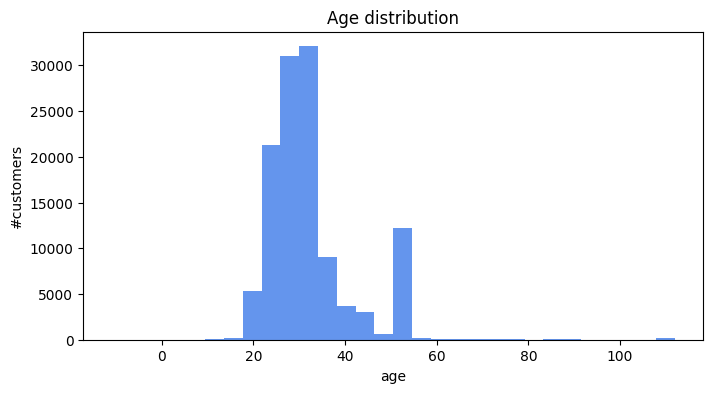

In [ ]:
# Phân bổ khách hàng theo độ tuổi
plt.figure(figsize=(8,4))
df_cus['age'].hist(bins = 30, color = 'cornflowerblue',grid = False)
plt.xlabel('age')
plt.ylabel('#customers')
plt.title('Age distribution')
plt.show()

1. vẽ biểu đồ histogram ra ta thấy người đặt vé xem phim có độ tuổi 20-40. Xu hướng giảm dần về 2 bên là nhóm số lượng đối tượng ít.
2. **Nhưng có một nhóm người tăng đột biến ở độ tuổi hơn 50 và một vài người khoảng 80 tuổi và trên 100 tuổi ??**

=> Liệu insight 2 có đúng như vậy ta có 3 nhóm male,female,not verify ta cùng phân tích độ tuổi theo nhóm giới tính để tìm hiểu thêm**

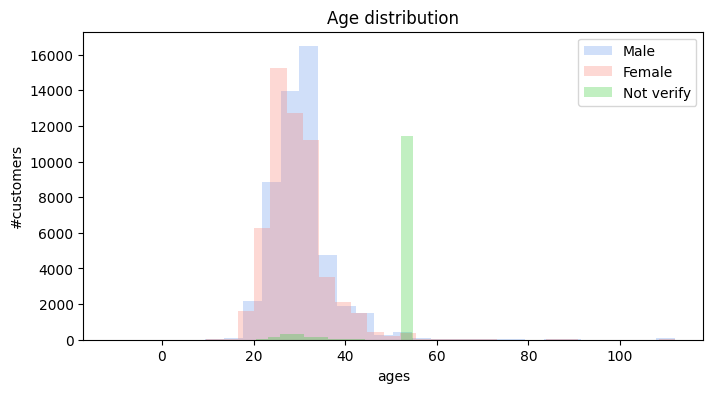

In [ ]:
# Phân bổ độ tuổi theo nhóm giới tính :
plt.figure(figsize=(8,4))

## data
male_age = df_cus[df_cus['usergender'] == 'Male']['age']
female_age = df_cus[df_cus['usergender'] == 'Female']['age']
unknown_age = df_cus[df_cus['usergender'] == 'Not verify']['age']

## plot
plt.hist(male_age, bins=30, alpha = 0.3, color = 'cornflowerblue', label = 'Male') #alpha: là độ đậm nhạt của màu sắc
plt.hist(female_age, bins=30, alpha = 0.3, color = 'salmon', label = 'Female')
plt.hist(unknown_age, bins=30, alpha = 0.3, color = 'limegreen', label = 'Not verify')

##edit
plt.title('Age distribution')
plt.xlabel('ages')
plt.ylabel('#customers')
plt.legend()
plt.show()


 1. *Xác định được độ tuổi khách hàng là từ 20 đến 40 tuổi ở Nam và Nữ (insight)*
2. Nhưng có một nhóm người tăng đột biến ở độ tuổi hơn 50 và một vài người khoảng 80 tuổi và trên 100 tuổi ??(Câu hỏi phía trên)

**=> Sau khi vẽ theo các nhóm giới tính ta nhận thấy nhóm tăng đột biến là nhóm chưa xác định được rõ giới tính, cần xác định số lượng là bao nhiêu, có thể họ không nhập đủ thông tin nên hệ thống tự mặc định là sinh năm 1970 là 54 tuổi**

In [ ]:
#Đánh giá chi tiết nhóm not verify
df_gen = df_cus.groupby(by='usergender').agg(
    total=('customer_id','count')
).sort_values('total', ascending = False).reset_index()

In [ ]:
df_gen

usergender  total
0      Female  55689
1        Male  50873
2  Not verify  12915

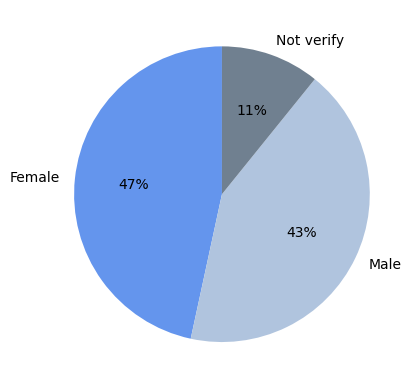

In [ ]:
#Visualize
plt.pie(df_gen['total'],labels = df_gen['usergender'], colors = ['cornflowerblue', 'lightsteelblue','slategrey'],autopct = '%1.0f%%',startangle=90)
#'%1.0f%%': '.0 là làm tròn đến chữ số
#startangle là bắt đầu từ móc
plt.show()

**Note**
Nhóm khách hàng chưa verify tài khoản chiếm hơn 11%. Dẫn đến 2 trường hợp:


1.   Nếu họ nhập dob thì sẽ có data
2.   Nếu họ không nhập thì hệ thống sẽ auto fill từ 1970 là 54 tuổi



In [ ]:
#Xác định lại 11% độ tuổi khoảng bao nhiêu và bao nhiêu người
df_cus[df_cus['usergender'] == 'Not verify'].groupby('age').agg(
    number = ('customer_id','count')
).reset_index().sort_values('number',ascending = False).head(10)

age  number
39   54   11435
14   29     126
13   28     118
11   26     113
15   30     113
16   31     109
12   27     108
17   32     104
10   25      90
19   34      89

### Age generation distribution

*Xác định được độ tuổi khách hàng là từ 20 đến 40 tuổi ở Nam và Nữ (insight) từ giói hạn độ tuổi này chúng ta có thể phân loại theo nhóm thế hệ hay không?*

In [ ]:
#Logic phân loại X,Y,Z, baby boomers(<1965)
#=> dựa vào năm sinh

In [ ]:
df_cus.head(2)

customer_id        dob  age usergender
0       100009 1989-02-25   35       Male
1       100493 1991-06-09   33       Male

In [ ]:
df_cus['age_generation']=df_cus['dob'].apply(lambda x: 'baby boomers' if x.year < 1965 else 'gen X' if x.year < 1981 else 'gen Y' if x.year < 1997 else 'gen Z')
#hàm apply: a function along one of the axis of the DataFrame, default =0 (index 0)
#hàm apply kết hợp với hàm lambda có khả năng thay thế các vòng lặp for-vòng khó khăn.
#.map () , .apply () , .groupby () , .rolling () kết hợp với hàm lambda

In [ ]:
df_gen_group = (
    df_cus[df_cus['usergender'] != 'Not verify']
    .groupby('age_generation')
    .agg(total = ('customer_id','count'))
    .sort_values(by='total',ascending = False).reset_index()
)

In [ ]:
df_gen_group

age_generation  total
0          gen Y  63310
1          gen Z  38401
2          gen X   4261
3   baby boomers    590

In [ ]:
df_cus_not_verify = df_cus[df_cus['usergender'] != 'Not verify']

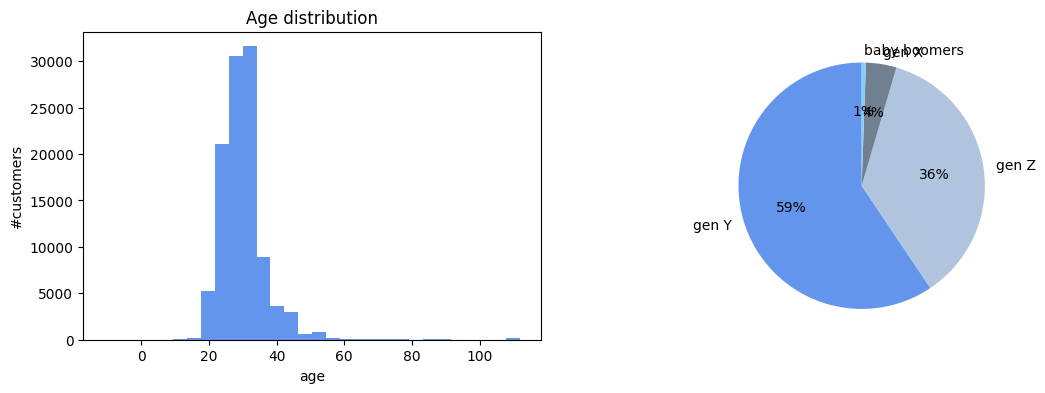

In [ ]:
#Kết hợp 2 biểu đồ cùng lúc
plt.figure(figsize = (13,4))

#plot 1
ax1 = plt.subplot(1,2,1)
#subplot(số dòng,có 2 cột,vị trí thứ nhất bên trái)
df_cus_not_verify['age'].hist(bins = 30,color='cornflowerblue',grid = False)
plt.xlabel('age')
plt.ylabel('#customers')
plt.title('Age distribution')

ax2 = plt.subplot(1,2,2)
#subplot(số dòng,có 2 cột,vị trí thứ nhất bên trái)
plt.pie(df_gen_group['total'],labels = df_gen_group['age_generation'], colors = ['cornflowerblue', 'lightsteelblue','slategrey','lightskyblue'],autopct = '%1.0f%%',startangle=90)
plt.show()

Tổng kết:
Góc nhìn thứ nhất: khách hàng độ tuổi từ 20 đến 40 nam nữ không có sự khác biệt, nhóm chưa xác định chiếm 11%
Góc nhìn thứ hai: xét theo nhóm thế hệ thì khách hàng chủ yếu tập trung và nhó Gen Y(59%) từ 29 tuổi đến 43 tuổi và Gen Z(36%) từ 28 tuổi trở về trước. Còn lại nhóm Gen X và Baby boomers chiếm thiểu số.

## 3.2 Time Series data - when did customers buy tickets?

### Trend by month

In [ ]:
df_join_all.head(2)
# dữ liệu của chúng ta không có cột theo tháng chỉ có time (thời gian đặt vé)
# => nên từ cột time này sẽ chuyển nó về các column về tháng về ngày

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  
0  Order successful     unknown  iPhone13,1   mobile     13008   35  
1  Order successful     unknown     browser  website     12174   33

In [ ]:
df_join_all['month'] = pd.to_datetime(df_join_all['time']).dt.month
df_join_all['name_day'] = pd.to_datetime(df_join_all['time']).dt.day_name()
df_join_all['hour'] = pd.to_datetime(df_join_all['time']).dt.hour
df_join_all['year_month'] = pd.to_datetime(df_join_all['time']).dt.strftime('%Y-%m')
#cột 'year_month' là format string

In [ ]:
#Thống kê theo tháng
df_time_month = (df_join_all.groupby('year_month')
                .agg(total_ticket = ('ticket_id','count'))
                .reset_index()#.sort_values(by='total',ascending = False)
)

In [ ]:
df_time_month.head(10)

year_month  total_ticket
0    2019-01          2019
1    2019-02          1626
2    2019-03          1004
3    2019-04          4069
4    2019-05          4430
5    2019-06          4387
6    2019-07          3872
7    2019-08          5444
8    2019-09          3278
9    2019-10          5284

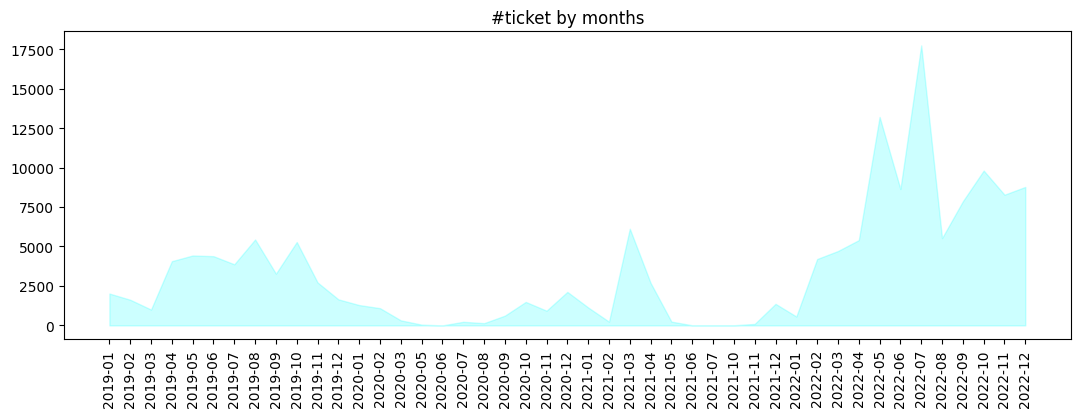

In [ ]:
#Vẽ biểu đồ miền theo tháng
plt.figure(figsize=(13,4))
plt.fill_between(df_time_month['year_month'],df_time_month['total_ticket'],color = 'aqua',alpha = 0.2)
plt.title('#ticket by months')
plt.xticks(rotation = 90) #rotation: quay vòng
plt.show()

1. Giai đoạn 1-2020 đến 8-2020 và giai đoạn 5-2021 đến 11-2021 xu hướng mua vé xem phim giảm dần và thấp do ảnh hưởng bởi covid-19 nên không đi xem phim được
2. Ta để ý thấy chúng ta không có cột tháng 4-2020 và tháng 8,9-2021, chúng ta không có data tỏng 2 giai đoạn này

**=> mình cần 1 bảng DIM thời gian theo tháng đầy đủ.**

In [ ]:
#Tạo bảng DIM về thời gian để JOIN với data ticket và vẽ lại chart

#Xác định khoảng thời gian của data
start_date = '2019-01-01'
end_date = '2022-12-31'

#Tạo ra range thời gian từ 2 cột mốc start và end
date_range = pd.date_range(start = start_date,end = end_date,freq = 'MS')
    #freq là tần suất và MS viết tắt của MS:month start frequency là ngưng tại tháng bắt đầu

#Lấy ra list phần tử thời gian tương ứng
list_month = date_range.month
list_month_name = date_range.strftime('%B')
    #trong hàm strftime là chuỗi biểu diễn các giá trị thời gian '%A' viết tắt của trả về day_name,'%B' viết tắt của tên tháng trong năm
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

##Khởi tạo dataframe
dim_time=pd.DataFrame({
    'month_number':list_month,
    'month_name':list_month_name,
    'year':list_year,
    'year_month':list_year_month,
})

In [ ]:
dim_time

month_number month_name  year year_month
0              1    January  2019    2019-01
1              2   February  2019    2019-02
2              3      March  2019    2019-03
3              4      April  2019    2019-04
4              5        May  2019    2019-05
5              6       June  2019    2019-06
6              7       July  2019    2019-07
7              8     August  2019    2019-08
8              9  September  2019    2019-09
9             10    October  2019    2019-10
10            11   November  2019    2019-11
11            12   December  2019    2019-12
12             1    January  2020    2020-01
13             2   February  2020    2020-02
14             3      March  2020    2020-03
15             4      April  2020    2020-04
16             5        May  2020    2020-05
17             6       June  2020    2020-06
18             7       July  2020    2020-07
19             8     August  2020    2020-08
20             9  September  2020    2020-09
21            10    October  2020    2020-10
22            11   November  2020    2020-11
23            12   December  2020    2020-12
24             1    January  2021    2021-01
25             2   February  2021    2021-02
26             3      March  2021    2021-03
27             4      April  2021    2021-04
28             5        May  2021    2021-05
29             6       June  2021    2021-06
30             7       July  2021    2021-07
31             8     August  2021    2021-08
32             9  September  2021    2021-09
33            10    October  2021    2021-10
34            11   November  2021    2021-11
35            12   December  2021    2021-12
36             1    January  2022    2022-01
37             2   February  2022    2022-02
38             3      March  2022    2022-03
39             4      April  2022    2022-04
40             5        May  2022    2022-05
41             6       June  2022    2022-06
42             7       July  2022    2022-07
43             8     August  2022    2022-08
44             9  September  2022    2022-09
45            10    October  2022    2022-10
46            11   November  2022    2022-11
47            12   December  2022    2022-12

In [ ]:
#JOIN với bảng df_join_all để đủ data thời gian
df_time_month_dim = (
    pd.merge(dim_time,df_join_all,how='left',on='year_month')
    .groupby('year_month')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_time_month_dim.replace(0,np.nan, inplace = True)

In [ ]:
df_time_month_dim

year_month  total_ticket
0     2019-01        2019.0
1     2019-02        1626.0
2     2019-03        1004.0
3     2019-04        4069.0
4     2019-05        4430.0
5     2019-06        4387.0
6     2019-07        3872.0
7     2019-08        5444.0
8     2019-09        3278.0
9     2019-10        5284.0
10    2019-11        2722.0
11    2019-12        1651.0
12    2020-01        1289.0
13    2020-02        1092.0
14    2020-03         319.0
15    2020-04           NaN
16    2020-05          49.0
17    2020-06           2.0
18    2020-07         229.0
19    2020-08         142.0
20    2020-09         619.0
21    2020-10        1488.0
22    2020-11         932.0
23    2020-12        2124.0
24    2021-01        1137.0
25    2021-02         237.0
26    2021-03        6127.0
27    2021-04        2690.0
28    2021-05         239.0
29    2021-06           9.0
30    2021-07          10.0
31    2021-08           NaN
32    2021-09           NaN
33    2021-10          10.0
34    2021-11          94.0
35    2021-12        1367.0
36    2022-01         564.0
37    2022-02        4206.0
38    2022-03        4713.0
39    2022-04        5403.0
40    2022-05       13209.0
41    2022-06        8640.0
42    2022-07       17740.0
43    2022-08        5531.0
44    2022-09        7864.0
45    2022-10        9810.0
46    2022-11        8280.0
47    2022-12        8774.0

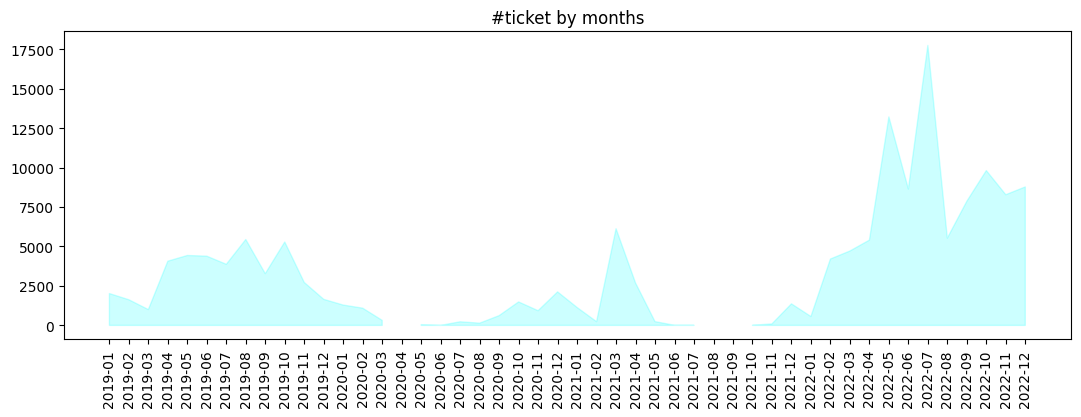

In [ ]:
# vẽ lại biểu đồ theo tháng
plt.figure(figsize=(13,4))
plt.fill_between(df_time_month_dim['year_month'],df_time_month_dim['total_ticket'],color = 'aqua',alpha = 0.2)
plt.title('#ticket by months')
plt.xticks(rotation = 90) #rotation: quay vòng
plt.show()

Nó vẫn có màu ở tháng 4/2020 và tháng 8,9/2021 tuy dữ liệu trên data là 0 vé đặt xem phim, vì số 0 vẫn là 1 con số nên muốn để trống chỗ này luôn thì đổi thành giá trị NULL

### Trend by week days


In [ ]:
# Thống kê theo ngày trong tuần
df_week_day= (
    df_join_all
    .groupby('name_day')
    .agg(total_ticket =('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_week_day

name_day  total_ticket
0     Friday         26438
1     Monday         16702
2   Saturday         34450
3     Sunday         26960
4   Thursday         19101
5    Tuesday         14793
6  Wednesday         16281

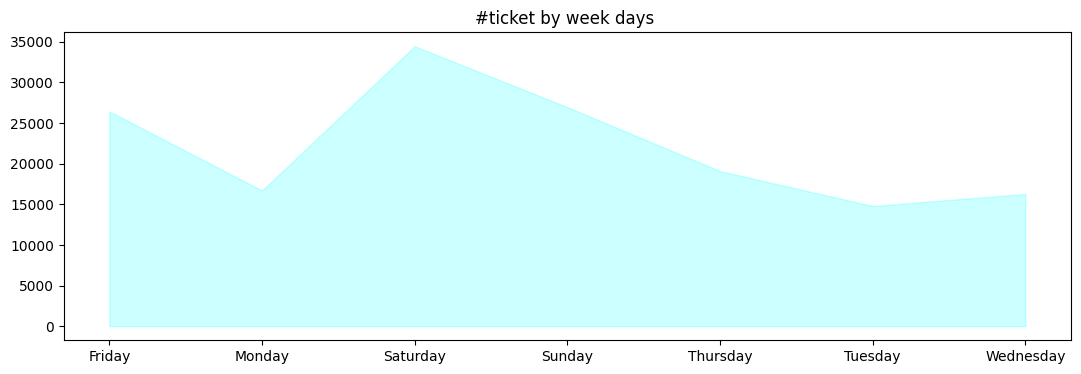

In [ ]:
#Vẽ biểu đồ theo ngày trong tuần
plt.figure(figsize=(13,4))
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'],color = 'aqua',alpha = 0.2)
plt.title('#ticket by week days ')
plt.show()

Ta thấy chúng bị đảo ngược thứ tự, chúng ta muốn xem xu hướng thời gian từ thứ 2 đến CN

In [ ]:
# Sắp xếp thứ tự các ngày trong tuần

# Định nghĩa lại thứ tự các ngày trong tuần
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Sắp xếp theo thứ tự các ngày trong tuần
df_week_day['day_order']=pd.Categorical(df_week_day['name_day'],categories=week_order,ordered=True)
  #hàm categorical là hàm phân loại
df_week_day.sort_values(by='day_order',inplace = True)

In [ ]:
df_week_day


name_day  total_ticket  day_order
1     Monday         16702     Monday
5    Tuesday         14793    Tuesday
6  Wednesday         16281  Wednesday
4   Thursday         19101   Thursday
0     Friday         26438     Friday
2   Saturday         34450   Saturday
3     Sunday         26960     Sunday

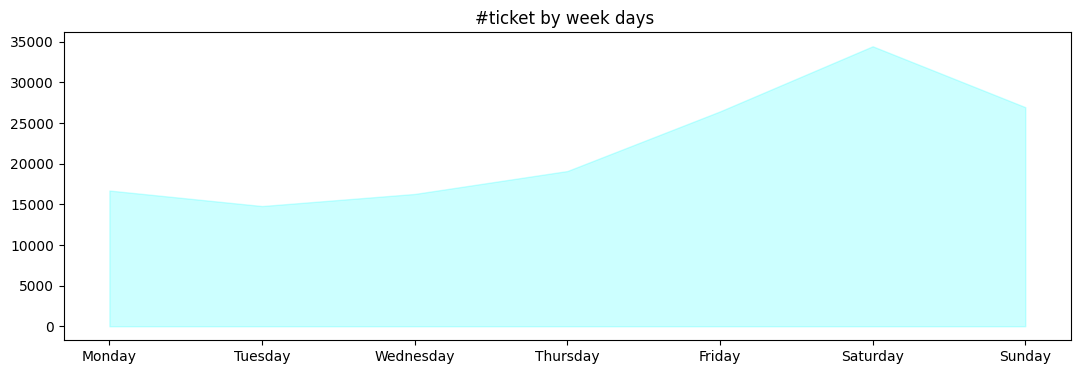

In [ ]:
#Vẽ lại biểu đồ theo ngày trong tuần
plt.figure(figsize=(13,4))
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'],color = 'aqua',alpha = 0.2)
plt.title('#ticket by week days ')
plt.show()

Xu hướng người ta thường đi xem phim nhiều vào cuối tuần từ thứ 5 đến CN, và đỉnh điểm là thứ 7.

### Trend by hour

In [ ]:
# Thống kê theo giờ
df_hour= (
    df_join_all
    .groupby('hour')
    .agg(total_ticket =('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_hour

hour  total_ticket
0      0          2352
1      1           964
2      2           398
3      3           159
4      4            74
5      5           146
6      6           536
7      7          1473
8      8          3865
9      9          7111
10    10          8793
11    11          9784
12    12         10794
13    13         10623
14    14          9854
15    15          9644
16    16         10452
17    17         11296
18    18         12328
19    19         12869
20    20         11372
21    21          8860
22    22          6595
23    23          4383

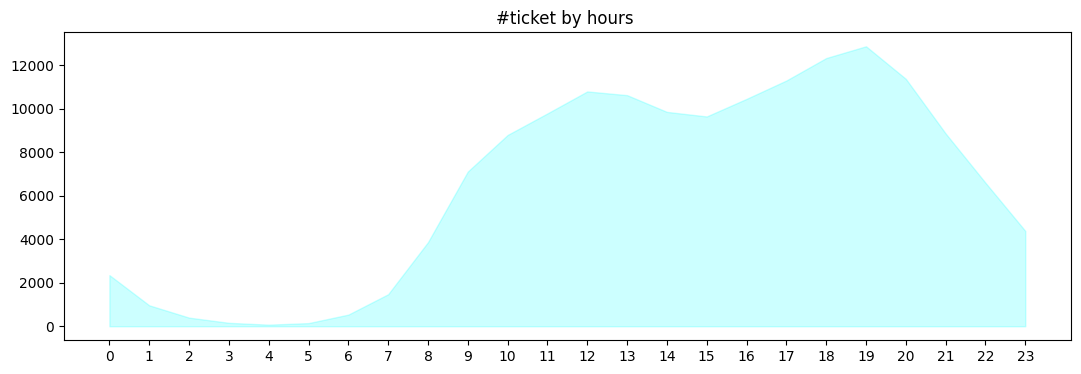

In [ ]:
#Vẽ lại biểu đồ theo giờ
plt.figure(figsize=(13,4))
plt.fill_between(df_hour['hour'],df_hour['total_ticket'],color = 'aqua',alpha = 0.2)
x_values = [i for i in range(0,24)] #biểu diễn đủ 1 đến 24 giờ
plt.xticks(x_values)
plt.title('#ticket by hours ')
plt.show()

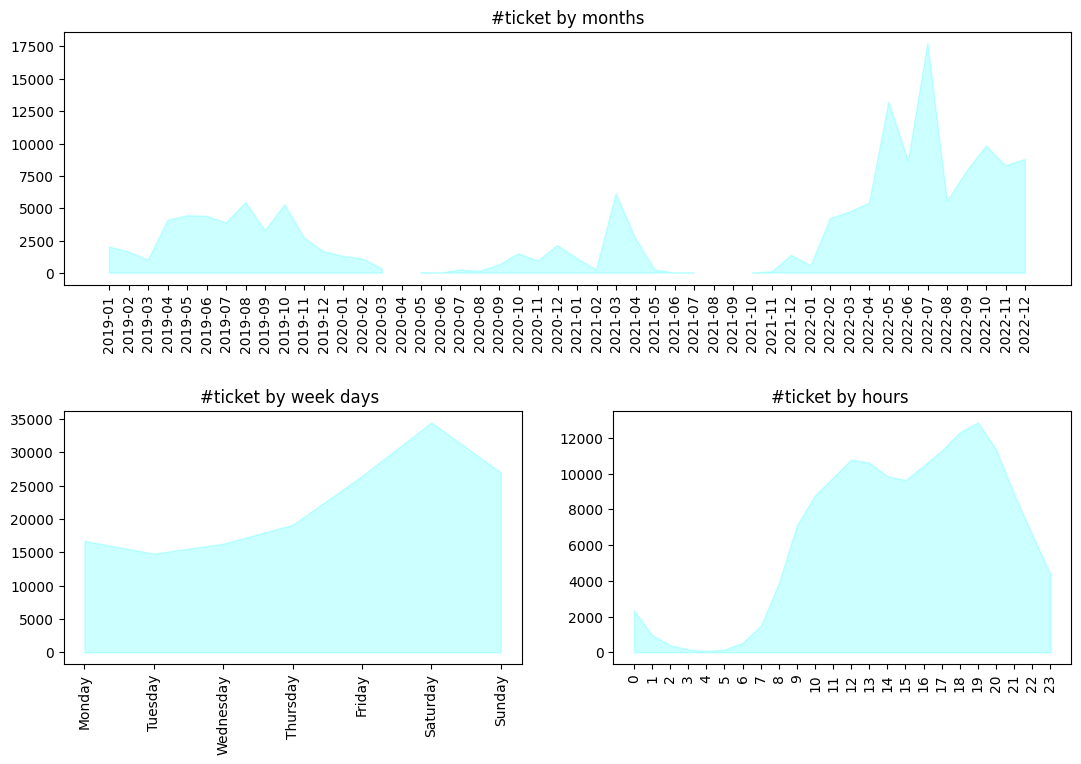

In [ ]:
# Vẽ chung trên 1 frame
plt.figure(figsize=(13,8))

#Chart 1 trend by months
ax1 = plt.subplot(2,1,1)
#subplot(số dòng nghĩa là số ô chia figure ra 2 nghĩa là chia thành 2,có 2 cột,vị trí thứ nhất bên trái)
plt.fill_between(df_time_month_dim['year_month'],df_time_month_dim['total_ticket'],color = 'aqua',alpha = 0.2)
plt.title('#ticket by months')
plt.xticks(rotation = 90) #rotation: quay vòng

#Chart 2 trend by week days
ax2 = plt.subplot(2,2,3)
plt.fill_between(df_week_day['name_day'],df_week_day['total_ticket'],color = 'aqua',alpha = 0.2)
plt.xticks(rotation = 90)
plt.title('#ticket by week days ')

#Chart 3 trend by hour
ax3 = plt.subplot(2,2,4)
plt.fill_between(df_hour['hour'],df_hour['total_ticket'],color = 'aqua',alpha = 0.2)
x_values = [i for i in range(0,24)] #biểu diễn đủ 1 đến 24 giờ
plt.xticks(x_values)
plt.xticks(rotation = 90)
plt.title('#ticket by hours ')

#Điều chỉnh figure lại 1 lần nữa
plt.subplots_adjust(hspace = 0.5, top = 0.9) #hspace là khoảng cách giữa hàng trên và hàng dưới

## 3.3 Factors related to the customer's purchasing process

### Payment platform

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  month  \
0  Order successful     unknown  iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown     browser  website     12174   33      7   

  name_day  hour year_month  
0   Friday    17    2022-07  
1   Friday    20    2022-07

In [ ]:
df_platform = (
    df_join_all[df_join_all['platform'] != 'unknown']
    .groupby('platform')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_platform

platform  total_ticket
0   mobile        138136
1  website         16511

Text(0.5, 1.0, 'ticket by platform')

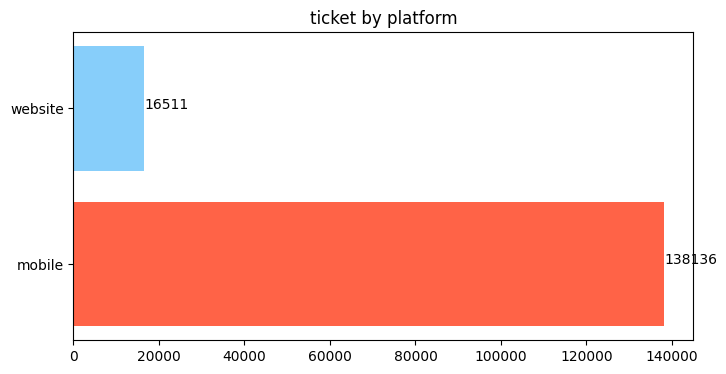

In [ ]:
# Có 2 cách một theo tỷ trọng vẽ biểu đồ tròn, hai là theo số lượng thì vẽ biểu đồ cột
# Biểu đồ cột ngang
plt.figure(figsize=(8,4))
plt.barh(df_platform['platform'],df_platform['total_ticket'],
         color = df_platform['platform'].replace({'mobile':'tomato','website':'lightskyblue'}))

for index,value in enumerate(df_platform['total_ticket']):
    plt.text(value,index,str(value))
# enumerate là function giúp chúng ta lấy ra từng cặp index với giá trị trong column, value có thể thay bằng i là tập hợp giá trị
plt.title('ticket by platform')

Text(0.5, 1.0, 'ticket by platform')

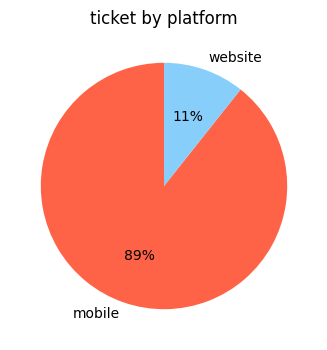

In [ ]:
#Biểu đồ tròn
plt.figure(figsize = (8,4))
plt.pie(df_platform['total_ticket'],labels = df_platform['platform'],colors =df_platform['platform'].replace({'mobile':'tomato','website':'lightskyblue'}) ,autopct = '%1.0f%%',startangle=90)
plt.title('ticket by platform')

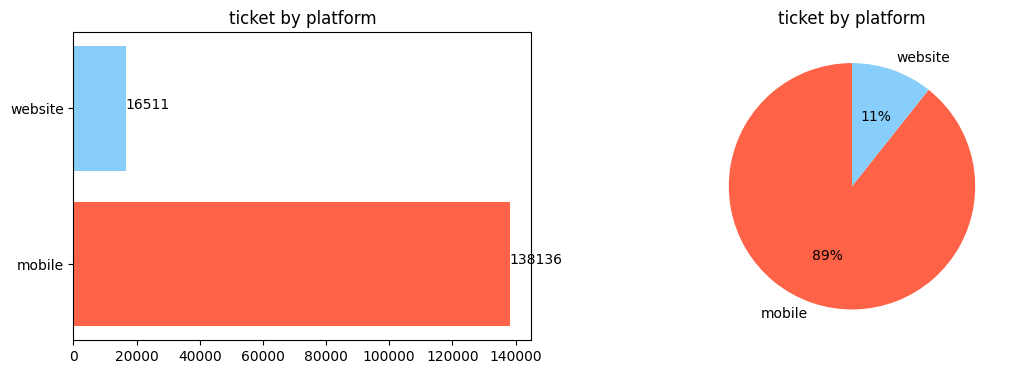

In [ ]:
# Biểu diễn chung
plt.figure(figsize=(13,4))

# Biểu đồ cột ngang
ax1=plt.subplot(1,2,1)
plt.barh(df_platform['platform'],df_platform['total_ticket'],
         color = df_platform['platform'].replace({'mobile':'tomato','website':'lightskyblue'}))

for index,value in enumerate(df_platform['total_ticket']):
    plt.text(value,index,str(value))
# enumerate là function giúp chúng ta lấy ra từng cặp index với giá trị, value có thể thay bằng i là tập hợp giá trị
plt.title('ticket by platform')

#Biểu đồ tròn
ax2=plt.subplot(1,2,2)
plt.pie(df_platform['total_ticket'],labels = df_platform['platform'],colors =df_platform['platform'].replace({'mobile':'tomato','website':'lightskyblue'}) ,autopct = '%1.0f%%',startangle=90)
plt.title('ticket by platform')

plt.show()



In [ ]:
#Góc nhìn thứ 2: theo thời gian. Xu hướng thời gian thì website và mobile có thay đổi như thế nào
df_platform_time=(
    df_join_all[df_join_all['platform'] != 'unknown']
    .groupby(['year_month','platform'])
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_platform_time

year_month platform  total_ticket
0     2019-01   mobile          2019
1     2019-02   mobile          1626
2     2019-03   mobile          1004
3     2019-04   mobile          4069
4     2019-05   mobile          4430
..        ...      ...           ...
66    2022-10  website          1849
67    2022-11   mobile          6677
68    2022-11  website          1603
69    2022-12   mobile          6959
70    2022-12  website          1815

[71 rows x 3 columns]

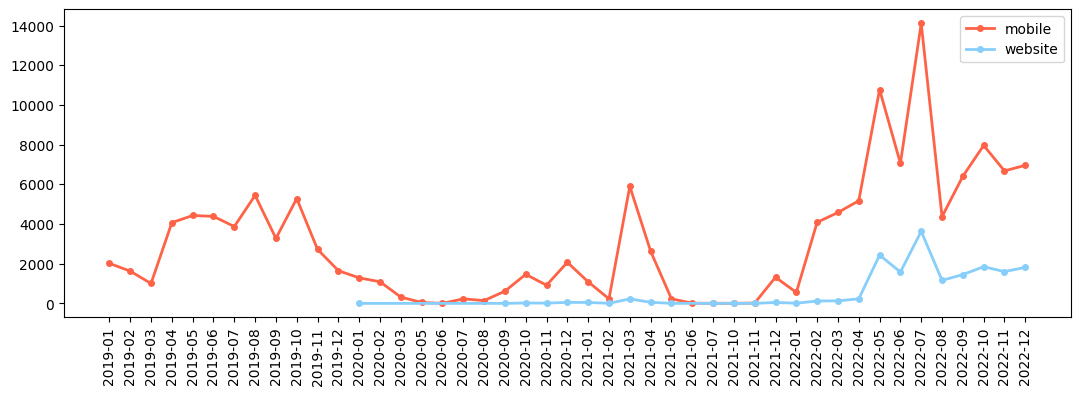

In [ ]:
# Vẽ biểu đồ line chart
plt.figure(figsize=(13,4))
df_mobile_line = df_platform_time[df_platform_time['platform'] =='mobile']
plt.plot(df_mobile_line['year_month'],df_mobile_line['total_ticket'],label='mobile',marker='o',color = 'tomato',linewidth=2,markersize=4)

df_web_line = df_platform_time[df_platform_time['platform'] =='website']
plt.plot(df_web_line['year_month'],df_web_line['total_ticket'],label='website',marker='o',color = 'lightskyblue',linewidth=2,markersize=4)
plt.xticks(rotation = 90)
plt.legend() #nhập label= ở trên rồi chỉ cần gọi legend ra
plt.show() #function show chỉ show hình ảnh

1. Sau khi phân tích khách hàng thanh toán qua nền tảng nào ta thấy trong suốt 4 năm vừa rồi khách hàng đều thanh toán qua mobile rất là nhiều đạt 89% còn website chỉ 11%. Đỉnh điểm là năm 2022 khi khách hàng thanh toán qua mobile
2. Website chỉ mới có vào giao đoạn 2022 thôi trước đó chưa có, khách hàng chỉ mới bắt đầu thanh toán nhiều qua website từ năm 2022




In [ ]:
df_web_line

year_month platform  total_ticket
13    2020-01  website             2
21    2020-09  website             2
23    2020-10  website            22
25    2020-11  website            15
27    2020-12  website            53
29    2021-01  website            48
31    2021-02  website             6
33    2021-03  website           228
35    2021-04  website            56
37    2021-05  website             4
40    2021-07  website             1
42    2021-10  website             1
44    2021-11  website             3
46    2021-12  website            48
48    2022-01  website            11
50    2022-02  website           120
52    2022-03  website           132
54    2022-04  website           230
56    2022-05  website          2434
58    2022-06  website          1582
60    2022-07  website          3632
62    2022-08  website          1159
64    2022-09  website          1455
66    2022-10  website          1849
68    2022-11  website          1603
70    2022-12  website          1815

### OS Version

In [ ]:
#Phân biệt OS version thành các nhóm: android_others,ios,unknown,browser
df_join_all['os_version']=df_join_all['model'].apply(lambda x: 'ios' if ('iPhone' in x or 'iPod' in x)
                                                      else 'browser' if 'browser' in x # 'browser' in x và x == 'browser'
                                                      else 'unknown' if ('devicemodel' in x or 'unknown' in x)
                                                      else 'android & other')
#.apply(lambda x: 'baby boomers' if x.year < 1965 else 'gen X' if x.year < 1981 else 'gen Y' if x.year < 1997 else 'gen Z')

In [ ]:
df_join_all['os_version'].unique()

array(['ios', 'browser', 'unknown', 'android & other'], dtype=object)

In [ ]:
# group by để thống kê
df_os = (df_join_all.groupby('os_version')
              .agg(total_ticket = ('ticket_id','count'))
              .sort_values(by='total_ticket',ascending = True).reset_index()
)

In [ ]:
df_os

os_version  total_ticket
0          browser         13377
1  android & other         21092
2              ios         51402
3          unknown         68854

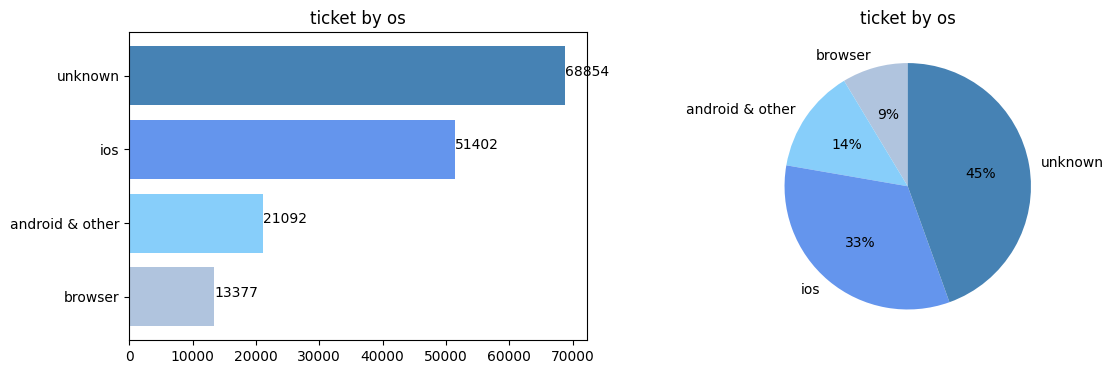

In [ ]:
# Biểu diễn chung
plt.figure(figsize=(13,4))

# Biểu đồ cột ngang
ax1=plt.subplot(1,2,1)
plt.barh(df_os['os_version'],df_os['total_ticket'],
         color = df_os['os_version']
         .replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}))

for index,value in enumerate(df_os['total_ticket']):
    plt.text(value,index,str(value))
# enumerate là function giúp chúng ta lấy ra từng cặp index với giá trị, value có thể thay bằng i là tập hợp giá trị
plt.title('ticket by os')

#Biểu đồ tròn
ax2=plt.subplot(1,2,2)
plt.pie(df_os['total_ticket'],labels = df_os['os_version'],
        colors = df_os['os_version']
        .replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
        autopct = '%1.0f%%',startangle=90)
plt.title('ticket by os')

plt.show()

In [ ]:
#Theo thời gian
df_os_time = (
    df_join_all.groupby(['year_month','os_version'])
    .agg(total_ticket = ('ticket_id','count'))
    .sort_values(by='year_month',ascending = True).reset_index()
)

In [ ]:
df_os_time

year_month       os_version  total_ticket
0      2019-01  android & other           713
1      2019-01              ios          1233
2      2019-01          unknown            73
3      2019-02  android & other           542
4      2019-02              ios          1074
..         ...              ...           ...
136    2022-11          browser          1078
137    2022-12          browser          1202
138    2022-12              ios          2124
139    2022-12  android & other            88
140    2022-12          unknown          5360

[141 rows x 3 columns]

In [ ]:
#Xử lý data dạng PIVOT để vẽ biểu đồ miền
df_os_time = (
    df_join_all
    .pivot_table(index = 'year_month', columns = 'os_version', aggfunc = 'count',values = 'ticket_id')
).reset_index()

In [ ]:
df_os_time

os_version year_month  android & other  browser     ios  unknown
0             2019-01            713.0      NaN  1233.0     73.0
1             2019-02            542.0      NaN  1074.0     10.0
2             2019-03            371.0      NaN   631.0      2.0
3             2019-04           1519.0      NaN  2541.0      9.0
4             2019-05           1601.0      NaN  2826.0      3.0
5             2019-06           1575.0      NaN  2808.0      4.0
6             2019-07           1373.0      NaN  2499.0      NaN
7             2019-08           1797.0      NaN  3642.0      5.0
8             2019-09           1122.0      NaN  2151.0      5.0
9             2019-10           1964.0      NaN  3313.0      7.0
10            2019-11            945.0      NaN  1777.0      NaN
11            2019-12            465.0      NaN  1185.0      1.0
12            2020-01            387.0      NaN   900.0      2.0
13            2020-02            301.0      NaN   791.0      NaN
14            2020-03             92.0      NaN   227.0      NaN
15            2020-05             15.0      NaN    34.0      NaN
16            2020-06              1.0      NaN     1.0      NaN
17            2020-07             62.0      NaN   167.0      NaN
18            2020-08             48.0      NaN    94.0      NaN
19            2020-09            185.0      2.0   432.0      NaN
20            2020-10            459.0     22.0  1007.0      NaN
21            2020-11            318.0     15.0   599.0      NaN
22            2020-12            717.0     53.0  1354.0      NaN
23            2021-01            397.0     48.0   692.0      NaN
24            2021-02             78.0      6.0   153.0      NaN
25            2021-03           1894.0    228.0  4005.0      NaN
26            2021-04            814.0     56.0  1820.0      NaN
27            2021-05             60.0      4.0   175.0      NaN
28            2021-06              3.0      NaN     6.0      NaN
29            2021-07              2.0      1.0     7.0      NaN
30            2021-10              3.0      1.0     4.0      2.0
31            2021-11              1.0      3.0    11.0     79.0
32            2021-12             61.0     48.0   184.0   1074.0
33            2022-01             25.0     11.0    69.0    459.0
34            2022-02            149.0    120.0   410.0   3527.0
35            2022-03             84.0    132.0   389.0   4108.0
36            2022-04             77.0    230.0   447.0   4649.0
37            2022-05            148.0   2434.0   788.0   9839.0
38            2022-06            116.0   1571.0   558.0   6395.0
39            2022-07            193.0   3064.0  1042.0  13441.0
40            2022-08             57.0    871.0   986.0   3617.0
41            2022-09            102.0    965.0  1873.0   4924.0
42            2022-10             91.0   1212.0  2348.0   6159.0
43            2022-11             77.0   1078.0  2025.0   5100.0
44            2022-12             88.0   1202.0  2124.0   5360.0

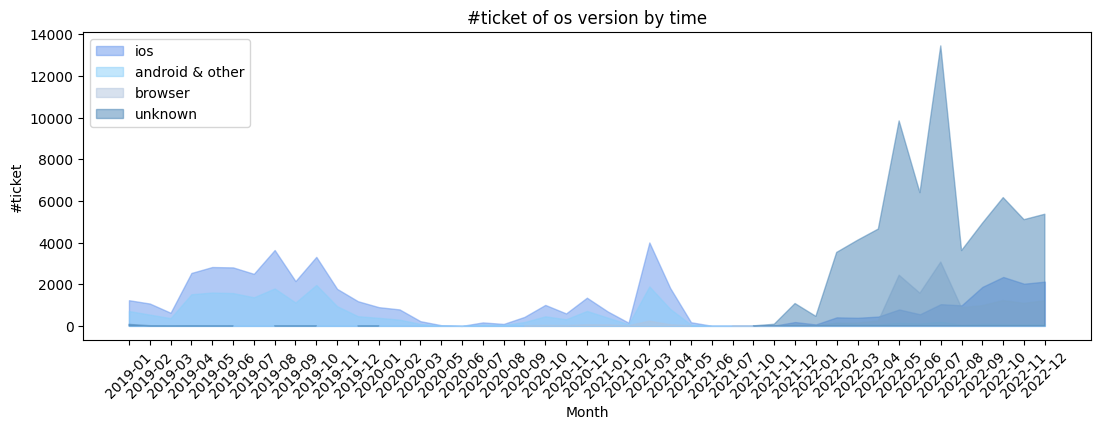

In [ ]:
#Vẽ biểu đồ miền THỜI GIAN
plt.figure(figsize=(13,4))

plt.fill_between(df_os_time['year_month'],df_os_time['ios'],color = 'cornflowerblue', alpha = 0.5,label = 'ios')
plt.fill_between(df_os_time['year_month'],df_os_time['android & other'],color = 'lightskyblue', alpha = 0.5,label = 'android & other')
plt.fill_between(df_os_time['year_month'],df_os_time['browser'],color = 'lightsteelblue', alpha = 0.5,label = 'browser')
plt.fill_between(df_os_time['year_month'],df_os_time['unknown'],color = 'steelblue', alpha = 0.5,label = 'unknown')

plt.title('#ticket of os version by time')
plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45)
plt.show()

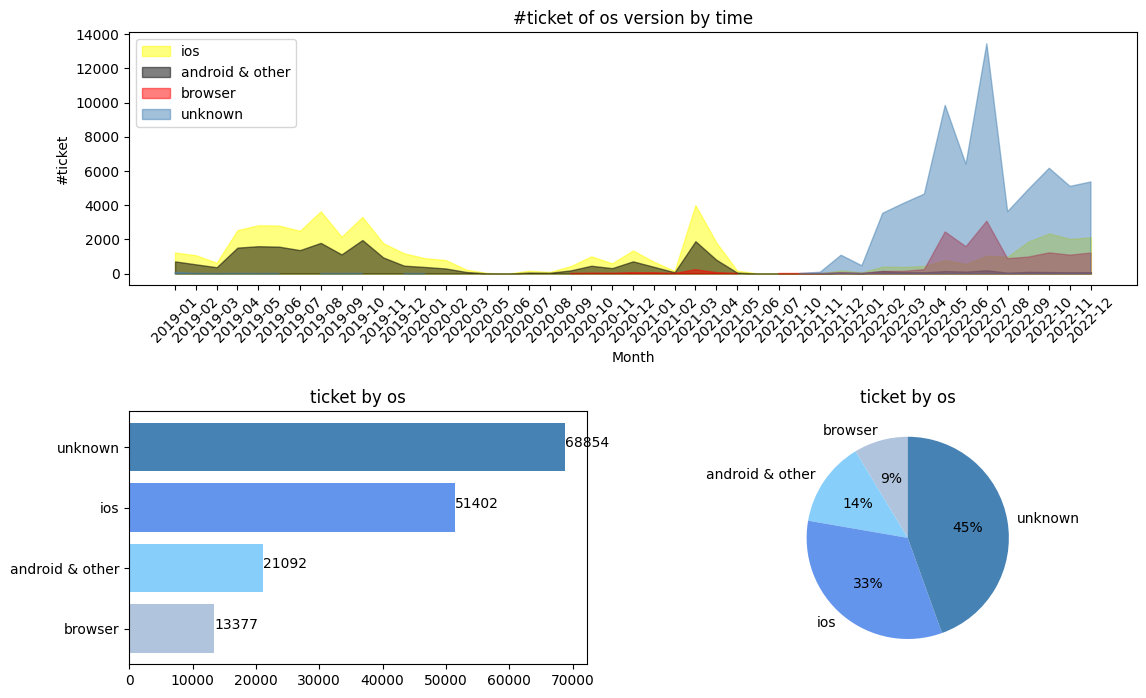

In [ ]:
#biểu diễn chung 1 frame
plt.figure(figsize=(13,8))

#Vẽ biểu đồ miền THỜI GIAN
ax1=plt.subplot(2,1,1)
plt.fill_between(df_os_time['year_month'],df_os_time['ios'],color = 'yellow', alpha = 0.5,label = 'ios')
plt.fill_between(df_os_time['year_month'],df_os_time['android & other'],color = 'black', alpha = 0.5,label = 'android & other')
plt.fill_between(df_os_time['year_month'],df_os_time['browser'],color = 'red', alpha = 0.5,label = 'browser')
plt.fill_between(df_os_time['year_month'],df_os_time['unknown'],color = 'steelblue', alpha = 0.5,label = 'unknown')
plt.title('#ticket of os version by time')
plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45)

# Biểu đồ cột ngang
ax2=plt.subplot(2,2,3)
plt.barh(df_os['os_version'],df_os['total_ticket'],
         color = df_os['os_version']
         .replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}))
for index,value in enumerate(df_os['total_ticket']):
    plt.text(value,index,str(value))
# enumerate là function giúp chúng ta lấy ra từng cặp index với giá trị, value có thể thay bằng i là tập hợp giá trị
plt.title('ticket by os')

#Biểu đồ tròn
ax3=plt.subplot(2,2,4)
plt.pie(df_os['total_ticket'],labels = df_os['os_version'],
        colors = df_os['os_version']
        .replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
        autopct = '%1.0f%%',startangle=90)
plt.title('ticket by os')

#Điều chỉnh figure lại 1 lần nữa
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.show()

1. Unknown lượt ticket_id đến tận 45% nhưng xuất hiện nhiều ở giai đoạn năm 2022 thôi, có thể năm 2022 đổi cách thức lưu trữ hoặc một lý do nào đó chúng ta mất 45% thông tin của khách hàng mua vé
2. Số lượng đặt vé trên ios nhiều hơn android và browser đến năm 2022 không thấy lượt mua vé trên android bị giảm đáng kể và lượt mua hàng trên browser tăng trong năm 2022

### Payment method

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  month  \
0  Order successful     unknown  iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown     browser  website     12174   33      7   

  name_day  hour year_month os_version  
0   Friday    17    2022-07        ios  
1   Friday    20    2022-07    browser

In [ ]:
df_join_all['paying_method'].unique()

array(['money in app', 'bank account', 'debit card', 'credit card',
       'other'], dtype=object)

In [ ]:
df_method = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .groupby('paying_method')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_method

paying_method  total_ticket
0  bank account         42057
1   credit card         15408
2    debit card         11395
3  money in app         64817

In [ ]:
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index = 'year_month',columns='paying_method',aggfunc = 'count',values='ticket_id')
).reset_index()

In [ ]:
df_method_time

paying_method year_month  bank account  credit card  debit card  money in app
0                2019-01         487.0        336.0        93.0         443.0
1                2019-02         484.0        370.0        93.0         480.0
2                2019-03         304.0        225.0        74.0         263.0
3                2019-04        1050.0        705.0       189.0        1246.0
4                2019-05        1092.0        903.0       212.0        1410.0
5                2019-06        1074.0        962.0       249.0        1319.0
6                2019-07         916.0        782.0       252.0        1215.0
7                2019-08        1367.0       1142.0       321.0        1684.0
8                2019-09         774.0        711.0       219.0        1068.0
9                2019-10        1280.0        914.0       309.0        1833.0
10               2019-11         701.0        658.0       208.0         788.0
11               2019-12         369.0        375.0       137.0         528.0
12               2020-01         336.0        264.0       111.0         411.0
13               2020-02         310.0        214.0       100.0         306.0
14               2020-03          91.0         69.0        34.0          91.0
15               2020-05          14.0         15.0         4.0          12.0
16               2020-06           1.0          NaN         NaN           1.0
17               2020-07          62.0         44.0        31.0          59.0
18               2020-08          44.0         23.0        18.0          42.0
19               2020-09         141.0         97.0        53.0         210.0
20               2020-10         396.0        192.0       135.0         546.0
21               2020-11         236.0        109.0        64.0         398.0
22               2020-12         511.0        245.0       174.0         881.0
23               2021-01         297.0        148.0        96.0         447.0
24               2021-02          55.0         21.0        18.0         103.0
25               2021-03        1904.0        528.0       473.0        2331.0
26               2021-04         925.0        255.0       215.0         960.0
27               2021-05          93.0         26.0        22.0          74.0
28               2021-06           3.0          NaN         2.0           3.0
29               2021-07           7.0          NaN         NaN           2.0
30               2021-10           6.0          1.0         NaN           3.0
31               2021-11          26.0         11.0         8.0          29.0
32               2021-12         477.0        133.0       112.0         456.0
33               2022-01         214.0         50.0        53.0         162.0
34               2022-02        1418.0        197.0       337.0        1511.0
35               2022-03        1662.0        272.0       426.0        1524.0
36               2022-04        1997.0        365.0       497.0        1744.0
37               2022-05        4649.0        698.0      1080.0        4938.0
38               2022-06        3001.0        549.0       735.0        3145.0
39               2022-07        4841.0        853.0      1346.0        8573.0
40               2022-08        1132.0        295.0       410.0        3209.0
41               2022-09        1712.0        411.0       610.0        4472.0
42               2022-10        2047.0        520.0       698.0        5658.0
43               2022-11        1719.0        432.0       596.0        4824.0
44               2022-12        1832.0        288.0       581.0        5415.0

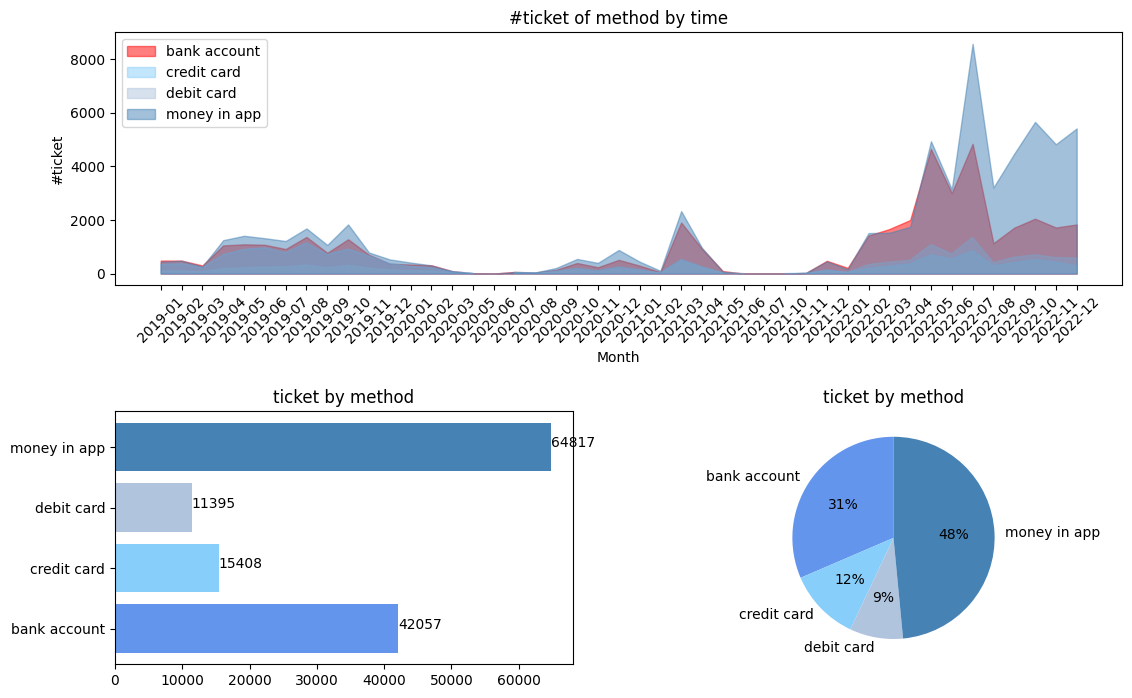

In [ ]:
#biểu diễn chung 1 frame
plt.figure(figsize=(13,8))

#Vẽ biểu đồ miền THỜI GIAN
ax1=plt.subplot(2,1,1)
plt.fill_between(df_method_time['year_month'],df_method_time['bank account'],color = 'red', alpha = 0.5,label = 'bank account')
plt.fill_between(df_method_time['year_month'],df_method_time['credit card'],color = 'lightskyblue', alpha = 0.5,label = 'credit card')
plt.fill_between(df_method_time['year_month'],df_method_time['debit card'],color = 'lightsteelblue', alpha = 0.5,label = 'debit card')
plt.fill_between(df_method_time['year_month'],df_method_time['money in app'],color = 'steelblue', alpha = 0.5,label = 'money in app')
plt.title('#ticket of method by time')
plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45)

# Biểu đồ cột ngang
ax2=plt.subplot(2,2,3)
plt.barh(df_method['paying_method'],df_method['total_ticket'],
         color = df_method['paying_method']
         .replace({ 'debit card': 'lightsteelblue',  'credit card': 'lightskyblue', 'bank account': 'cornflowerblue', 'money in app': 'steelblue'}))
for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
# enumerate là function giúp chúng ta lấy ra từng cặp index với giá trị, value có thể thay bằng i là tập hợp giá trị
plt.title('ticket by method')

#Biểu đồ tròn
ax3=plt.subplot(2,2,4)
plt.pie(df_method['total_ticket'],labels = df_method['paying_method'],
        colors = df_method['paying_method']
        .replace({ 'debit card': 'lightsteelblue',  'credit card': 'lightskyblue', 'bank account': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct = '%1.0f%%',startangle=90)
plt.title('ticket by method')

#Điều chỉnh figure lại 1 lần nữa
plt.subplots_adjust(hspace = 0.5, top = 0.9)
plt.show()

In [ ]:
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index = 'year_month',columns='paying_method',aggfunc = 'count',values='ticket_id')
).reset_index()

# Biểu đồ miền lồng quá nhiều vào nhau khó thấy được sự trên lệnh tỷ trọng vào từng thời đểm
# Nên ta vẽ thêm biểu đồ miền 100% theo giai đoạn
df_method_time_pct = df_method_time.copy() #tạo ra bảng copy để dữ liệu bảng df_method_time không bị lỗi và vẽ ko bị lỗi
df_method_time_pct = df_method_time_pct.fillna(0) #để tránh lỗi những giá trị NA chuyển về giá trị 0 hết
df_method_time_pct['total'] = df_method_time_pct.iloc[:,1:].sum(axis=1)
#[:'nghĩa là lấy hết',vị trí từ 1 đến hết].sum(axis = 1 nghĩa là theo hàng ngang, =0 theo các cột)
# vị trí từ 1 đến hết, thứ tự các cột [index,0,1,2,..-1]
# hàm loc() dựa trên label trong dataframe còn hàm iloc() chủ yếu dựa trên vị trí số nguyên (từ 0 đến chiều dài-1 của trục)
# nghĩa là theo cột để tính toán

for i in df_method_time_pct.columns[1:5]: # nhớ đang cần truy xuất các cột để chạy for không dùng[] để truy xuất cột dùng hàm columns
  df_method_time_pct[i + '_pct'] = df_method_time_pct[i] / df_method_time_pct['total']

In [ ]:
df_method_time_pct.tail(10)
#lưu ý: tính toán mỗi lần chạy nó sẽ update lên nên ta chạy lại từ bảng df_method_time sẽ ko lỗi tính toán

paying_method year_month  bank account  credit card  debit card  money in app  \
35               2022-03        1662.0        272.0       426.0        1524.0   
36               2022-04        1997.0        365.0       497.0        1744.0   
37               2022-05        4649.0        698.0      1080.0        4938.0   
38               2022-06        3001.0        549.0       735.0        3145.0   
39               2022-07        4841.0        853.0      1346.0        8573.0   
40               2022-08        1132.0        295.0       410.0        3209.0   
41               2022-09        1712.0        411.0       610.0        4472.0   
42               2022-10        2047.0        520.0       698.0        5658.0   
43               2022-11        1719.0        432.0       596.0        4824.0   
44               2022-12        1832.0        288.0       581.0        5415.0   

paying_method    total  bank account_pct  credit card_pct  debit card_pct  \
35              3884.0          0.427909         0.070031        0.109681   
36              4603.0          0.433847         0.079296        0.107973   
37             11365.0          0.409063         0.061417        0.095029   
38              7430.0          0.403903         0.073890        0.098923   
39             15613.0          0.310062         0.054634        0.086210   
40              5046.0          0.224336         0.058462        0.081252   
41              7205.0          0.237613         0.057044        0.084663   
42              8923.0          0.229407         0.058276        0.078225   
43              7571.0          0.227051         0.057060        0.078721   
44              8116.0          0.225727         0.035485        0.071587   

paying_method  money in app_pct  
35                     0.392379  
36                     0.378883  
37                     0.434492  
38                     0.423284  
39                     0.549094  
40                     0.635949  
41                     0.620680  
42                     0.634092  
43                     0.637168  
44                     0.667201

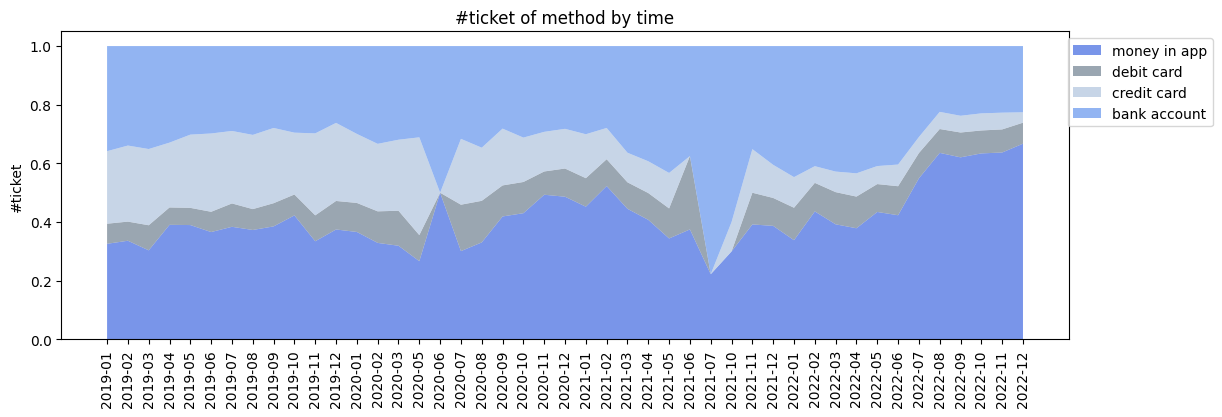

In [ ]:
# vẽ biểu đồ miền 100%
plt.figure(figsize=(13,4))
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

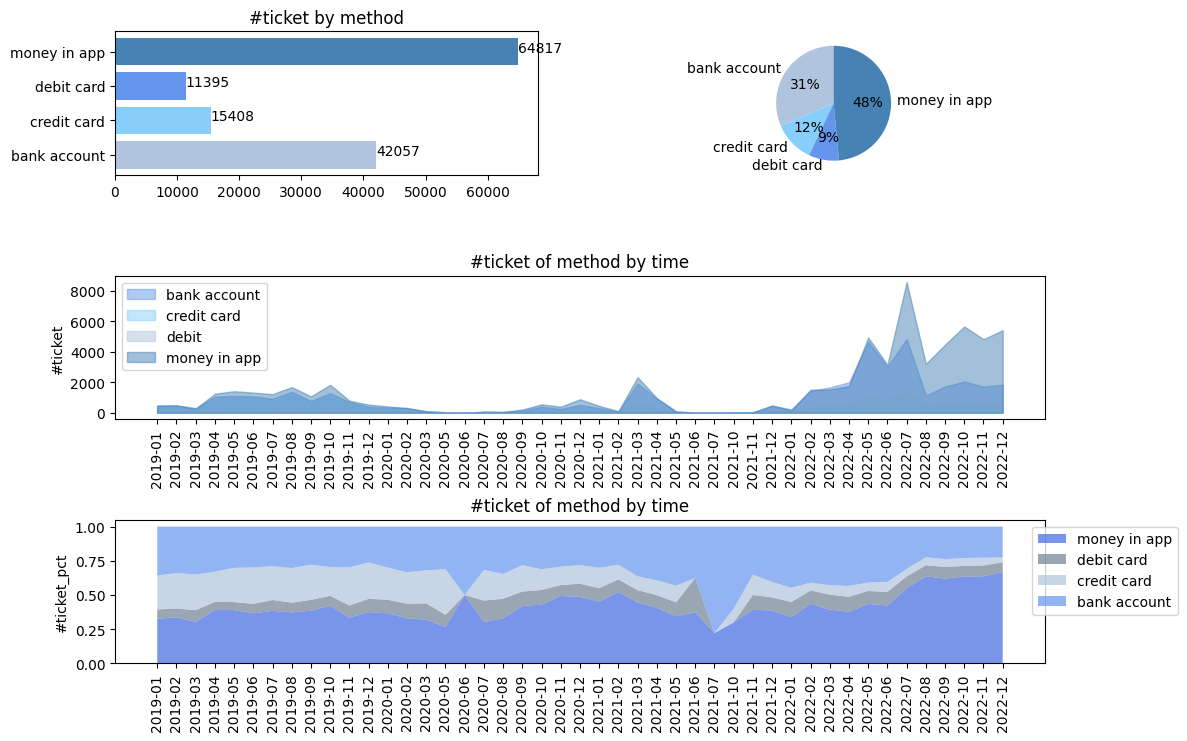

In [ ]:
# biểu diễn chung 1 frame
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_method['paying_method'], df_method['total_ticket'],
    color = df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(3,2,2)
plt.pie(df_method['total_ticket'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


ax4 = plt.subplot(3,1,3)
# vẽ biểu đồ miền 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
# plt.xlabel('Month')
plt.ylabel('#ticket_pct')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # 1.15 cách ra figure 1.15
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)
plt.show()

### Promotion

In [ ]:
df_join_all['campaign_type'].unique()

array(['direct discount', 'unknown', 'voucher', 'reward point'],
      dtype=object)

In [ ]:
df_join_all['type'] = df_join_all['campaign_type'].apply(lambda x: 'non-promotion' if x == 'unknown' else 'promotion')

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  month  \
0  Order successful     unknown  iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown     browser  website     12174   33      7   

  name_day  hour year_month os_version       type  
0   Friday    17    2022-07        ios  promotion  
1   Friday    20    2022-07    browser  promotion

In [ ]:
df_type = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .groupby('type')
    .agg(total_ticket = ('ticket_id','count'))
    .reset_index().sort_values(by = 'total_ticket',ascending = True)
)

In [ ]:
df_type

type  total_ticket
0  non-promotion         55155
1      promotion         78522

In [ ]:
#xử lý data dạng Pivot để vẽ biểu đồ miền của khuyến mãi và không khuyến mãi theo thời gian
df_type_time =(
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index = 'year_month',columns = 'type',aggfunc = 'count',values='ticket_id')
    .reset_index()
)
# tính pct
df_type_time_pct = df_type_time.copy()
df_type_time_pct = df_type_time_pct.fillna(0)
df_type_time_pct['total'] = df_type_time_pct.iloc[:,1:].sum(axis = 1)

for i in df_type_time_pct.columns[1:3]:
  df_type_time_pct[i + '_pct'] = df_type_time_pct[i] / df_type_time_pct['total']

In [ ]:
df_type_time_pct

type year_month  non-promotion  promotion    total  non-promotion_pct  \
0       2019-01          517.0      842.0   1359.0           0.380427   
1       2019-02         1335.0       92.0   1427.0           0.935529   
2       2019-03          835.0       31.0    866.0           0.964203   
3       2019-04         1699.0     1491.0   3190.0           0.532602   
4       2019-05         1564.0     2053.0   3617.0           0.432403   
5       2019-06         1391.0     2213.0   3604.0           0.385960   
6       2019-07         1364.0     1801.0   3165.0           0.430964   
7       2019-08         1556.0     2958.0   4514.0           0.344705   
8       2019-09          922.0     1850.0   2772.0           0.332612   
9       2019-10         1354.0     2982.0   4336.0           0.312269   
10      2019-11          894.0     1461.0   2355.0           0.379618   
11      2019-12         1409.0        0.0   1409.0           1.000000   
12      2020-01          849.0      273.0   1122.0           0.756684   
13      2020-02          418.0      512.0    930.0           0.449462   
14      2020-03          149.0      136.0    285.0           0.522807   
15      2020-05           45.0        0.0     45.0           1.000000   
16      2020-06            2.0        0.0      2.0           1.000000   
17      2020-07          196.0        0.0    196.0           1.000000   
18      2020-08          127.0        0.0    127.0           1.000000   
19      2020-09          299.0      202.0    501.0           0.596806   
20      2020-10          529.0      740.0   1269.0           0.416864   
21      2020-11          286.0      521.0    807.0           0.354399   
22      2020-12          783.0     1028.0   1811.0           0.432358   
23      2021-01          336.0      652.0    988.0           0.340081   
24      2021-02          133.0       64.0    197.0           0.675127   
25      2021-03         2783.0     2453.0   5236.0           0.531513   
26      2021-04         1100.0     1255.0   2355.0           0.467091   
27      2021-05          136.0       79.0    215.0           0.632558   
28      2021-06            8.0        0.0      8.0           1.000000   
29      2021-07            9.0        0.0      9.0           1.000000   
30      2021-10           10.0        0.0     10.0           1.000000   
31      2021-11           42.0       32.0     74.0           0.567568   
32      2021-12          421.0      757.0   1178.0           0.357385   
33      2022-01          157.0      322.0    479.0           0.327766   
34      2022-02         1022.0     2441.0   3463.0           0.295120   
35      2022-03         1050.0     2834.0   3884.0           0.270340   
36      2022-04         1145.0     3458.0   4603.0           0.248751   
37      2022-05         2347.0     9018.0  11365.0           0.206511   
38      2022-06         2471.0     4959.0   7430.0           0.332571   
39      2022-07         5441.0    10172.0  15613.0           0.348492   
40      2022-08         2588.0     2458.0   5046.0           0.512881   
41      2022-09         4172.0     3033.0   7205.0           0.579042   
42      2022-10         4987.0     3936.0   8923.0           0.558893   
43      2022-11         2627.0     4944.0   7571.0           0.346982   
44      2022-12         3647.0     4469.0   8116.0           0.449359   

type  promotion_pct  
0          0.619573  
1          0.064471  
2          0.035797  
3          0.467398  
4          0.567597  
5          0.614040  
6          0.569036  
7          0.655295  
8          0.667388  
9          0.687731  
10         0.620382  
11         0.000000  
12         0.243316  
13         0.550538  
14         0.477193  
15         0.000000  
16         0.000000  
17         0.000000  
18         0.000000  
19         0.403194  
20         0.583136  
21         0.645601  
22         0.567642  
23         0.659919  
24         0.324873  
25         0.468487  
26         0.532909  
27         0.367442  
28 

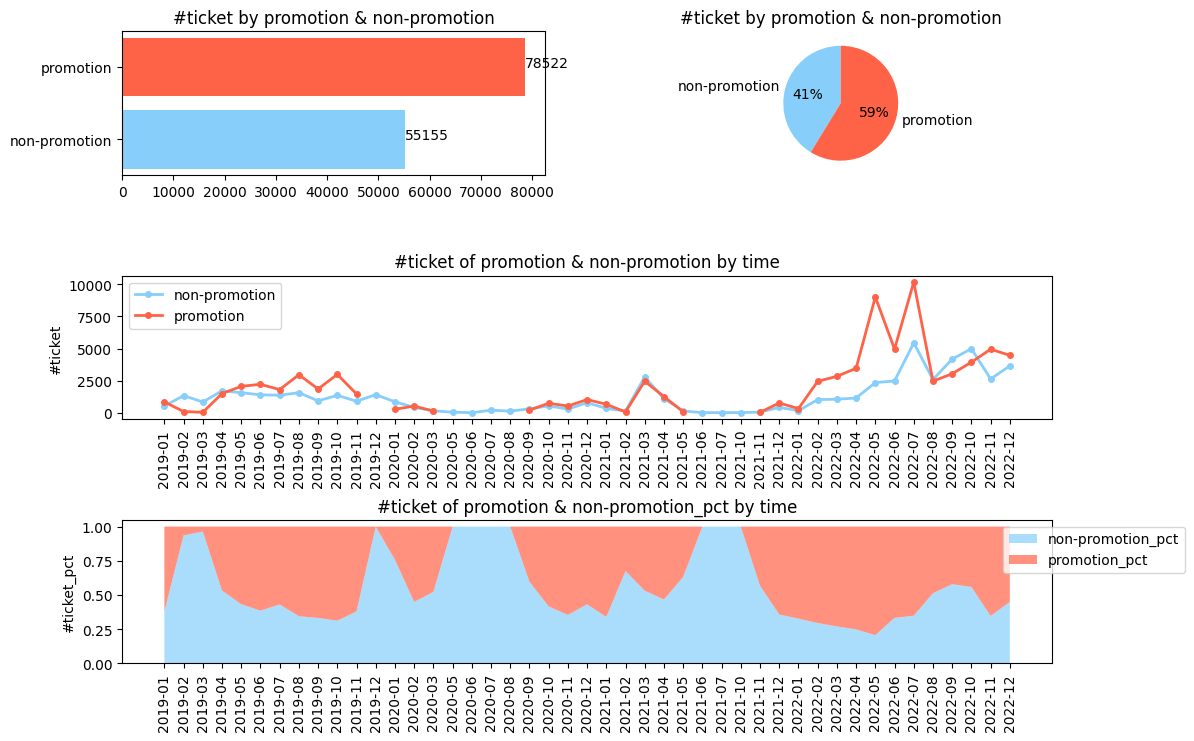

In [ ]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_type['type'], df_type['total_ticket'],
    color = df_type['type'].replace({ 'non-promotion': 'lightskyblue', 'promotion': 'tomato'})
)

for index,value in enumerate(df_type['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by promotion & non-promotion')

ax2 = plt.subplot(3,2,2)
plt.pie(df_type['total_ticket'], labels= df_type['type'],
        colors=df_type['type'].replace({'non-promotion': 'lightskyblue', 'promotion': 'tomato'}),
        autopct='%1.0f%%',
        startangle=90)
plt.title('#ticket by promotion & non-promotion')

ax3 = plt.subplot(3,1,2)
plt.plot(df_type_time['year_month'],df_type_time['non-promotion'],label = 'non-promotion',marker = 'o',color='lightskyblue',linewidth = 2,markersize = 4)
plt.plot(df_type_time['year_month'],df_type_time['promotion'],label = 'promotion',marker = 'o',color = 'tomato',linewidth = 2,markersize = 4)
plt.title('#ticket of promotion & non-promotion by time')
# plt.xlabel('Month')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)


ax4 = plt.subplot(3,1,3)
# vẽ biểu đồ miền 100%
plt.stackplot(df_type_time_pct['year_month'], df_type_time_pct['non-promotion_pct'],  df_type_time_pct['promotion_pct'],
               labels=['non-promotion_pct', 'promotion_pct'], colors=['lightskyblue', 'tomato'], alpha=0.7)

plt.title('#ticket of promotion & non-promotion_pct by time')
# plt.xlabel('Month')
plt.ylabel('#ticket_pct')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # 1.15 cách ra figure 1.15
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)
plt.show()

### Which movies they watched?

In [ ]:
df_film_sum = (
    df_join_all[df_join_all['status_id'] == 1]
    .groupby('movie_name')
    .agg(total_ticket = ('ticket_id','count'),
         total_customer = ('customer_id','nunique'),
         revenue = ('final_price','sum'))
    .sort_values(by='total_ticket',ascending = False)
    .reset_index()
)

In [ ]:
df_film_sum.head(30)

movie_name  total_ticket  total_customer  \
0   Doctor Strange In The Multiverse Of Madness          8615            8409   
1                      Minions: The Rise Of Gru          7224            7014   
2                      Avatar: The Way Of Water          5870            5612   
3                        Thor: Love And Thunder          5589            5478   
4                                     Peninsula          5499            5365   
5              Black Panther 2: Wakanda Forever          3847            3790   
6                                    Black Adam          3229            3186   
7                             Avengers: Endgame          3219            3135   
8                                 Dad I'm Sorry          3023            2817   
9                                  Love Destiny          2411            2376   
10                                You And Trinh          2308            2273   
11        Fast & Furious Presents: Hobbs & Shaw          2112            2093   
12                        Emergency Declaration          1987            1945   
13                      Jurassic World Dominion          1939            1922   
14                            Godzilla Vs. Kong          1732            1691   
15      Detective Conan: The Bride Of Halloween          1532            1500   
16                                        Joker          1447            1438   
17                      Spider-Man: No Way Home          1432            1395   
18                                       Batman          1405            1391   
19                             Blood Moon Party          1393            1333   
20      Fantastic Beasts: Secrets Of Dumbledore          1352            1331   
21                            Top Gun: Maverick          1318            1307   
22                                  Naked Truth          1240            1191   
23     Doraemon: Nobita's Little Star Wars 2021          1236            1192   
24                          One Piece Film: Red          1180            1160   
25     Confidential Assignment 2: International          1160            1147   
26                           Extremely Easy Job          1156            1137   
27                                      Morbius          1156            1145   
28                     Spider-Man Far From Home          1153            1142   
29                                   Maleficent          1087            1076   

     revenue  
0   65579.98  
1   56530.93  
2   59830.95  
3   43372.90  
4   41208.44  
5   26860.28  
6   23159.34  
7   26690.48  
8   25863.28  
9   18345.61  
10  18467.26  
11  15026.59  
12  15107.76  
13  17568.52  
14  13719.65  
15  10346.57  
16  10327.97  
17  11545.53  
18  10427.03  
19   9774.54  
20   9999.70  
21   9863.88  
22   9329.49  
23   9981.38  
24   9149.09  
25   8191.97  
26  10278.27  
27   8883.41  
28   8204.50  
29   6911.48

In [ ]:
list_film = df_film_sum[df_film_sum['total_ticket'] > 1000]['movie_name'].unique()
list_selected_film = list(list_film)

In [ ]:
list_selected_film

['Doctor Strange In The Multiverse Of Madness',
 'Minions: The Rise Of Gru',
 'Avatar: The Way Of Water',
 'Thor: Love And Thunder',
 'Peninsula',
 'Black Panther 2: Wakanda Forever',
 'Black Adam',
 'Avengers: Endgame',
 "Dad I'm Sorry",
 'Love Destiny',
 'You And Trinh',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Emergency Declaration',
 'Jurassic World Dominion',
 'Godzilla Vs. Kong',
 'Detective Conan: The Bride Of Halloween',
 'Joker',
 'Spider-Man: No Way Home',
 'Batman',
 'Blood Moon Party',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Top Gun: Maverick',
 'Naked Truth',
 "Doraemon: Nobita's Little Star Wars 2021",
 'One Piece Film: Red',
 'Confidential Assignment 2: International',
 'Extremely Easy Job',
 'Morbius',
 'Spider-Man Far From Home',
 'Maleficent',
 'Face Off: 48h',
 'Parasite']

In [ ]:
df_movie_time_pivot=(
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['movie_name'].isin(list_selected_film))]
    .pivot_table(index='year_month',columns='movie_name',aggfunc='count',values='ticket_id')
    .reset_index()
)

In [ ]:
df_movie_time_pivot

movie_name year_month  Avatar: The Way Of Water  Avengers: Endgame  Batman  \
0             2019-04                       NaN             2081.0     NaN   
1             2019-05                       NaN             1130.0     NaN   
2             2019-06                       NaN                8.0     NaN   
3             2019-07                       NaN                NaN     NaN   
4             2019-08                       NaN                NaN     NaN   
5             2019-09                       NaN                NaN     NaN   
6             2019-10                       NaN                NaN     NaN   
7             2019-11                       NaN                NaN     NaN   
8             2020-02                       NaN                NaN     NaN   
9             2020-03                       NaN                NaN     NaN   
10            2020-05                       NaN                NaN     NaN   
11            2020-06                       NaN                NaN     NaN   
12            2020-07                       NaN                NaN     NaN   
13            2020-08                       NaN                NaN     NaN   
14            2020-10                       NaN                NaN     NaN   
15            2020-11                       NaN                NaN     NaN   
16            2020-12                       NaN                NaN     NaN   
17            2021-02                       NaN                NaN     NaN   
18            2021-03                       NaN                NaN     NaN   
19            2021-04                       NaN                NaN     NaN   
20            2021-05                       NaN                NaN     NaN   
21            2021-07                       NaN                NaN     NaN   
22            2021-10                       NaN                NaN     NaN   
23            2021-11                       NaN                NaN     NaN   
24            2021-12                       NaN                NaN     NaN   
25            2022-01                       NaN                NaN     NaN   
26            2022-02                       NaN                NaN     8.0   
27            2022-03                       NaN                NaN  1380.0   
28            2022-04                       NaN                NaN    17.0   
29            2022-05                       NaN                NaN     NaN   
30            2022-06                       NaN                NaN     NaN   
31            2022-07                       NaN                NaN     NaN   
32            2022-08                       NaN                NaN     NaN   
33            2022-09                       NaN                NaN     NaN   
34            2022-10                       NaN                NaN     NaN   
35            2022-11                       NaN                NaN     NaN   
36            2022-12                    5870.0                NaN     NaN   

movie_name  Black Adam  Black Panther 2: Wakanda Forever  Blood Moon Party  \
0                  NaN                               NaN               NaN   
1                  NaN                               NaN               NaN   
2                  NaN                               NaN               NaN   
3                  NaN                               NaN               NaN   
4                  NaN                               NaN               NaN   
5                  NaN                               NaN               NaN   
6                  NaN                               NaN               NaN   
7                  NaN                               NaN               NaN   
8                  NaN                               NaN               NaN   
9                  NaN                               NaN               NaN   
10                 NaN                               NaN               NaN   
11                 NaN                               NaN               NaN   
12                 Na

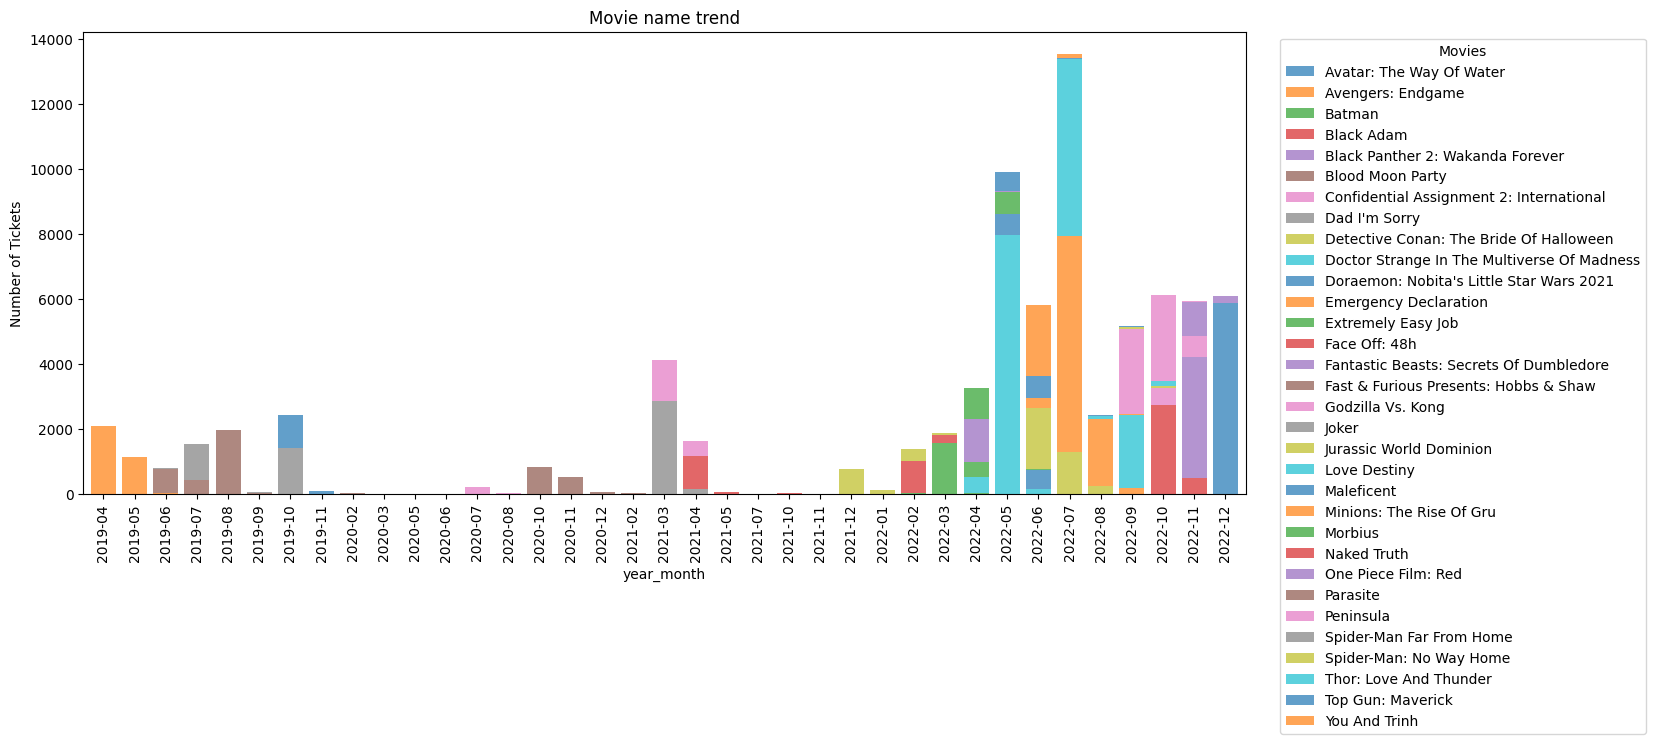

In [ ]:
#biểu đồ bar cột chồng lên nhau
df_movie_time_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
plt.title('Movie name trend')
# ax.set_xlabel('Month')
plt.ylabel('Number of Tickets')

# Add a legend
plt.legend(title='Movies', loc='upper right', bbox_to_anchor=(1.35, 1))

# Show the plot
plt.show()

## 3.4 Customer value dimension

* **Mục tiêu**: phân tích các chỉ số về giá trị mà 1 khách hàng mang lại
** **Frequency**: count, day,month
** **Monetary**: total_money, total_discount
** **Success rate**: number_success rate/ total
** **Promotion rate**: number_promotion/total_success
** **Discount rate**: sum discount/ sum money

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  month  \
0  Order successful     unknown  iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown     browser  website     12174   33      7   

  name_day  hour year_month os_version       type  
0   Friday    17    2022-07        ios  promotion  
1   Friday    20    2022-07    browser  promotion

In [ ]:
# Tính tất cả các chỉ số trên

# Tính các chỉ số cho những vé thanh toán thành công

def calculate_n_promotion(x):
  return (x == 'promotion').sum()

df_success_matric = (
    df_join_all[df_join_all['status_id'] == 1]
    .assign(date = pd.to_datetime(df_join_all['time']).dt.date)
# hàm assign là hàm khai báo 1 cột bằng 1 phép tính nào đó và cột này có có khi trong phép tính chứ không lưu cột này vào dataframe
    .groupby('customer_id')
    .agg(
        n_success = ('ticket_id','count'),
        s_money = ('original_price','sum'),
        s_discount = ('discount_value','sum'),
        n_days = ('date','nunique'),
        n_months = ('year_month','nunique'),
        n_promotions = ('type',calculate_n_promotion)
    )
    .reset_index()
)

In [ ]:
#chúng ta đã có bảng các chỉ số thanh toán về thành công của tất cả khách hàng
df_success_matric

customer_id  n_success  s_money  s_discount  n_days  n_months  \
0            100001          1     7.42        2.06       1         1   
1            100003          6    60.95        2.56       6         6   
2            100004          1    32.25        0.00       1         1   
3            100005          1     9.49        2.06       1         1   
4            100006          1    12.37        0.00       1         1   
...             ...        ...      ...         ...     ...       ...   
105771       231393          1    14.39        1.65       1         1   
105772       231395          1     5.16        1.90       1         1   
105773       231397          1    10.72        1.65       1         1   
105774       231398          1    11.92        1.24       1         1   
105775       231399          1     4.33        1.24       1         1   

        n_promotions  
0                  1  
1                  1  
2                  0  
3                  1  
4                  0  
...              ...  
105771             1  
105772             1  
105773             1  
105774             1  
105775             1  

[105776 rows x 7 columns]

In [ ]:
# tính các chỉ số về total và giao dịch lỗi của tất cả khách hàng

def calculate_n_failed(x):
  return(x != 1).sum() #status_id =1 là thành công

df_failed_matric = (
    df_join_all
    .groupby('customer_id')
    .agg(
        n_total = ('ticket_id','count'),
        n_failed = ('status_id',calculate_n_failed)
    )
    .reset_index()
)

In [ ]:
df_failed_matric

customer_id  n_total  n_failed
0            100001        1         0
1            100003        6         0
2            100004        1         0
3            100005        1         0
4            100006        1         0
...             ...      ...       ...
119472       231393        1         0
119473       231395        1         0
119474       231397        1         0
119475       231398        1         0
119476       231399        1         0

[119477 rows x 3 columns]

In [ ]:
#join 2 bảng này lại
df_customer_value = (
    pd.merge(df_failed_matric,df_success_matric,how = 'left',on='customer_id') #join theo bảng df_failed_matric vì đây là bảng đầy đủ có total
    .fillna(0)
)

In [ ]:
df_customer_value

customer_id  n_total  n_failed  n_success  s_money  s_discount  \
0            100001        1         0        1.0     7.42        2.06   
1            100003        6         0        6.0    60.95        2.56   
2            100004        1         0        1.0    32.25        0.00   
3            100005        1         0        1.0     9.49        2.06   
4            100006        1         0        1.0    12.37        0.00   
...             ...      ...       ...        ...      ...         ...   
119472       231393        1         0        1.0    14.39        1.65   
119473       231395        1         0        1.0     5.16        1.90   
119474       231397        1         0        1.0    10.72        1.65   
119475       231398        1         0        1.0    11.92        1.24   
119476       231399        1         0        1.0     4.33        1.24   

        n_days  n_months  n_promotions  
0          1.0       1.0           1.0  
1          6.0       6.0           1.0  
2          1.0       1.0           0.0  
3          1.0       1.0           1.0  
4          1.0       1.0           0.0  
...        ...       ...           ...  
119472     1.0       1.0           1.0  
119473     1.0       1.0           1.0  
119474     1.0       1.0           1.0  
119475     1.0       1.0           1.0  
119476     1.0       1.0           1.0  

[119477 rows x 9 columns]

In [ ]:
df_customer_value['success_rate']=df_customer_value['n_success']/df_customer_value['n_total']
df_customer_value['promotion_rate']=df_customer_value['n_promotions']/df_customer_value['n_success']
df_customer_value['discount_rate']=df_customer_value['s_discount']/df_customer_value['s_money']
# 3 chỉ số này tính trên đơn vị pct(%)

In [ ]:
df_customer_value.head(5)

customer_id  n_total  n_failed  n_success  s_money  s_discount  n_days  \
0       100001        1         0        1.0     7.42        2.06     1.0   
1       100003        6         0        6.0    60.95        2.56     6.0   
2       100004        1         0        1.0    32.25        0.00     1.0   
3       100005        1         0        1.0     9.49        2.06     1.0   
4       100006        1         0        1.0    12.37        0.00     1.0   

   n_months  n_promotions  success_rate  promotion_rate  discount_rate  
0       1.0           1.0           1.0        1.000000       0.277628  
1       6.0           1.0           1.0        0.166667       0.042002  
2       1.0           0.0           1.0        0.000000       0.000000  
3       1.0           1.0           1.0        1.000000       0.217071  
4       1.0           0.0           1.0        0.000000       0.000000

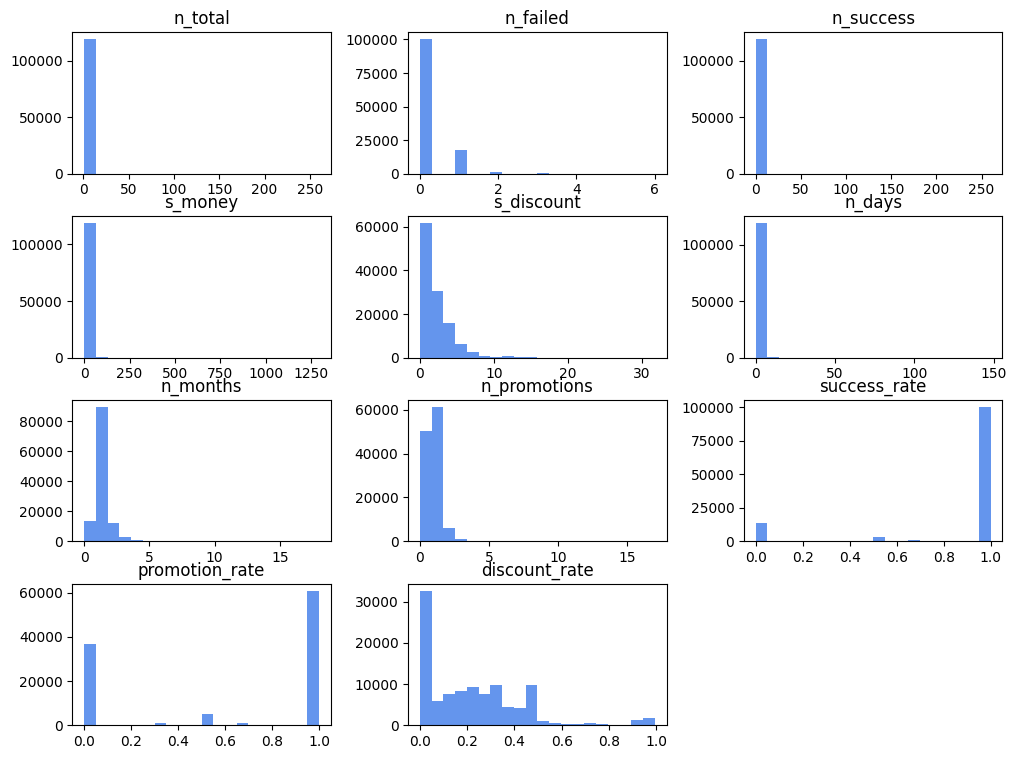

In [ ]:
# Visualize tất cả các chỉ số bằng histogram:
df_customer_value.iloc[:,1:].hist(figsize=(12,9),grid = False,color = 'cornflowerblue',bins=20)
plt.show()

1. **n_total:** Hầu hết mọi người mua rất ít vé khoảng (1-2) nhưng có top những người mua rất nhiều vé -> cần check lại những người này
2. Có rất nhiều người bị fail 1 lần khoảng 100.000 người
3. **Success rate:** có khoảng 1 nhóm người SUCCESS_RATE=0% (10%-> kiểm tra lỗi gì?, mất khách hàng luôn)
4. **promotion_rate:** Có khoảng 60.000 KH chỉ mua vé khi mà promotion (khi mà promotion_rate = 100%)
5. **n_promotion:** Ta thấy có khoảng 60.000 chỉ có 1 đơn hàng khuyến mãi thôi


**Design Thinking:** Có thể 60.000 người này chỉ có 1 đơn hàng khuyến mãi chính là nhóm 60.000 mua vé promotion_rate = 100% và cũng là những người n_total thanh toán 1 lần rồi bỏ đi

**Nhìn vào biểu đồ liên tục hỏi tại sao, kết hợp với các thông tin sản phẩm và kinh nghiệm thì chúng ta mới tìm ra được insight thực. This is Data Analysis. Tiếp tục đầo sâu các nghi vấn trên để ra được vấn đề (deep dive)**

### Frequency & anomaly behavior

In [ ]:
# Phân tích nghi vấn 1: Hầu hết mọi người mua rất ít vé khoảng (1-2) nhưng có top những người mua rất nhiều vé -> cần check lại những người này
df_customer_value['n_order_dis']=df_customer_value['n_success'].apply(lambda x: 'more than 10' if x >= 10 else str(x))
#dis viết tắt của distribution

In [ ]:
df_customer_value

customer_id  n_total  n_failed  n_success  s_money  s_discount  \
0            100001        1         0        1.0     7.42        2.06   
1            100003        6         0        6.0    60.95        2.56   
2            100004        1         0        1.0    32.25        0.00   
3            100005        1         0        1.0     9.49        2.06   
4            100006        1         0        1.0    12.37        0.00   
...             ...      ...       ...        ...      ...         ...   
119472       231393        1         0        1.0    14.39        1.65   
119473       231395        1         0        1.0     5.16        1.90   
119474       231397        1         0        1.0    10.72        1.65   
119475       231398        1         0        1.0    11.92        1.24   
119476       231399        1         0        1.0     4.33        1.24   

        n_days  n_months  n_promotions  success_rate  promotion_rate  \
0          1.0       1.0           1.0           1.0        1.000000   
1          6.0       6.0           1.0           1.0        0.166667   
2          1.0       1.0           0.0           1.0        0.000000   
3          1.0       1.0           1.0           1.0        1.000000   
4          1.0       1.0           0.0           1.0        0.000000   
...        ...       ...           ...           ...             ...   
119472     1.0       1.0           1.0           1.0        1.000000   
119473     1.0       1.0           1.0           1.0        1.000000   
119474     1.0       1.0           1.0           1.0        1.000000   
119475     1.0       1.0           1.0           1.0        1.000000   
119476     1.0       1.0           1.0           1.0        1.000000   

        discount_rate n_order_dis  
0            0.277628         1.0  
1            0.042002         6.0  
2            0.000000         1.0  
3            0.217071         1.0  
4            0.000000         1.0  
...               ...         ...  
119472       0.114663         1.0  
119473       0.368217         1.0  
119474       0.153918         1.0  
119475       0.104027         1.0  
119476       0.286374         1.0  

[119477 rows x 13 columns]

In [ ]:
df_n_dis = df_customer_value.groupby('n_order_dis').agg(
    total_cus = ('customer_id','count')
).reset_index()

In [ ]:
df_n_dis

n_order_dis  total_cus
0            0.0      13701
1            1.0      87921
2            2.0      12902
3            3.0       3145
4            4.0       1017
5            5.0        380
6            6.0        168
7            7.0         92
8            8.0         47
9            9.0         30
10  more than 10         74

Text(0.5, 1.0, '#customer of each group')

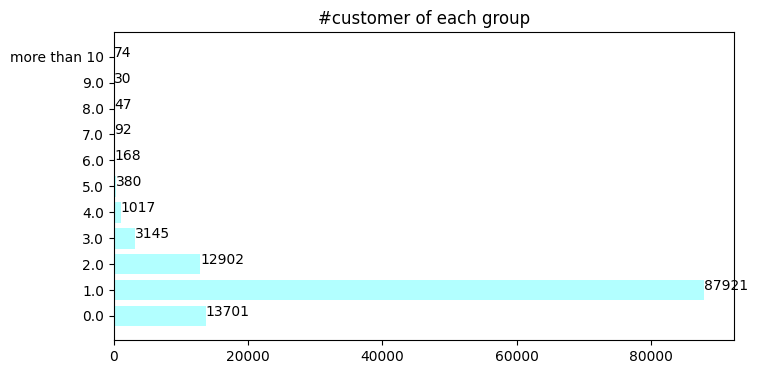

In [ ]:
plt.figure(figsize=(8,4))
plt.barh(df_n_dis['n_order_dis'], df_n_dis['total_cus'], color = 'aqua',alpha = 0.3)

for index,value in enumerate(df_n_dis['total_cus']):
  plt.text(value,index,str(value))
plt.title('#customer of each group')

Ta thấy:
1. Có tổng 11977 khách hàng, khách hàng mua 0 lần 13701 khoảng 10%
2. Khách hàng mua 1 lần rồi thôi 87921 khoảng 70%
3. Số còn lại mua trên 2 vé nhưng khoảng 5% khách hàng mua trên 3 vé
4. Có khoảng 74 người mua trên 10 vé ?? Tại sao

In [ ]:
df_customer_value.count()

customer_id       119477
n_total           119477
n_failed          119477
n_success         119477
s_money           119477
s_discount        119477
n_days            119477
n_months          119477
n_promotions      119477
success_rate      119477
promotion_rate    105776
discount_rate     105776
n_order_dis       119477
dtype: int64

In [ ]:
# Nếu họ mua dồn vào 1 lúc --> bất thường
# Nếu họ mua dàn trải --> loyal customer, bình thường

In [ ]:
df_customer_value.sort_values(by='n_success',ascending = False).head(20)

customer_id  n_total  n_failed  n_success  s_money  s_discount  \
2686         102948      260         0      260.0  1291.25        3.38   
48948        153588      108         1      107.0   434.59        0.00   
10604        111644      104         0      104.0   581.70       18.52   
15783        117362      104         1      103.0   744.86        8.62   
16687        118349       83         3       80.0   344.56        4.21   
20907        122962       77         1       76.0   447.00        1.86   
72718        179471       69         1       68.0   375.91        7.14   
62432        168132       69         3       66.0   249.03        0.00   
111563       222641       51         0       51.0   240.84        2.31   
53097        158089       53         2       51.0   245.14        1.69   
115005       226527       49         0       49.0   339.56       12.79   
15888        117475       49         1       48.0   297.40        2.56   
48524        153124       49         3       46.0   337.88       27.02   
7438         108162       44         1       43.0   272.12        6.72   
7389         108110       43         2       41.0   184.65        1.24   
29091        131905       39         1       38.0   242.70        0.00   
115304       226886       37         0       37.0   186.01        1.90   
15581        117140       36         0       36.0   150.73       13.11   
7947         108729       34         0       34.0   163.40        0.00   
2765         103035       34         0       34.0   318.70        0.00   

        n_days  n_months  n_promotions  success_rate  promotion_rate  \
2686     148.0      18.0           1.0      1.000000        0.003846   
48948     77.0      14.0           0.0      0.990741        0.000000   
10604     85.0      18.0           9.0      1.000000        0.086538   
15783     79.0      15.0           6.0      0.990385        0.058252   
16687     62.0      17.0           1.0      0.963855        0.012500   
20907     45.0       9.0           3.0      0.987013        0.039474   
72718     51.0       9.0           4.0      0.985507        0.058824   
62432     59.0      14.0           0.0      0.956522        0.000000   
111563    41.0      11.0           3.0      1.000000        0.058824   
53097     40.0      14.0           2.0      0.962264        0.039216   
115005    38.0       7.0           5.0      1.000000        0.102041   
15888     30.0      13.0           1.0      0.979592        0.020833   
48524     43.0      17.0           7.0      0.938776        0.152174   
7438      38.0      14.0           2.0      0.977273        0.046512   
7389      32.0      10.0           2.0      0.953488        0.048780   
29091     35.0      18.0           0.0      0.974359        0.000000   
115304    27.0       5.0           1.0      1.000000        0.027027   
15581     31.0      15.0           5.0      1.000000        0.138889   
7947      29.0       4.0           0.0      1.000000        0.000000   
2765      24.0      10.0           0.0      1.000000        0.000000   

        discount_rate   n_order_dis  
2686         0.002618  more than 10  
48948        0.000000  more than 10  
10604        0.031838  more than 10  
15783        0.011573  more than 10  
16687        0.012218  more than 10  
20907        0.004161  more than 10  
72718        0.018994  more than 10  
62432        0.000000  more than 10  
111563       0.009591  more than 10  
53097        0.006894  more than 10  
115005       0.037666  more than 10  
15888        0.008608  more than 10  
48524        0.079969  more than 10  
7438         0.024695  more than 10  
7389         0.006715  more than 10  
29091        0.000000  more than 10  
115304       0.010215  more than 10  
15581        0.086977  more than 10  
7947         0.000000  more than 10  
2765         0.000000  more than 10

In [ ]:
list_customer_massive = list(df_customer_value[df_customer_value['n_success'] >= 30]['customer_id'].unique())

In [ ]:
list_customer_massive

[102948,
 103035,
 103347,
 108110,
 108162,
 108729,
 111644,
 114205,
 117140,
 117362,
 117475,
 118349,
 122962,
 131905,
 153124,
 153588,
 158089,
 168132,
 179471,
 222641,
 226527,
 226886]

In [ ]:
df_customer_massive_pivot = (
    df_join_all[(df_join_all['customer_id'].isin(list_customer_massive)) & (df_join_all['status_id'] == 1)]
    .pivot_table(index='year_month',columns = 'customer_id', aggfunc = 'count',values = 'ticket_id' )
    .reset_index()
)
# .pivot_table(index = 'year_month',columns = 'type',aggfunc = 'count',values='ticket_id')

In [ ]:
df_customer_massive_pivot

customer_id year_month  102948  103035  103347  108110  108162  108729  \
0              2019-01     NaN     NaN     NaN     NaN     1.0     NaN   
1              2019-02     NaN     NaN     NaN     NaN     1.0     NaN   
2              2019-03     NaN     NaN     NaN     NaN     NaN     NaN   
3              2019-04     NaN     3.0     NaN     NaN     1.0     NaN   
4              2019-05     NaN     2.0     NaN     NaN     4.0     NaN   
5              2019-06     NaN     NaN     NaN     NaN     2.0     NaN   
6              2019-07     NaN     NaN     NaN     NaN     NaN     NaN   
7              2019-08     NaN     3.0     NaN     NaN     NaN     NaN   
8              2019-09     NaN     2.0     NaN     NaN     NaN     NaN   
9              2019-10     NaN     4.0     NaN     NaN     NaN     NaN   
10             2019-11     NaN     NaN     NaN     NaN     4.0     NaN   
11             2019-12     NaN     1.0     NaN     NaN     7.0     NaN   
12             2020-01     NaN     NaN     NaN     NaN    10.0     NaN   
13             2020-02     NaN     1.0     NaN     NaN     3.0     NaN   
14             2020-03     NaN     NaN     NaN     NaN     NaN     NaN   
15             2020-07     NaN     NaN     NaN     NaN     NaN     NaN   
16             2020-08     NaN     1.0     NaN     NaN     NaN     NaN   
17             2020-09     NaN     NaN     NaN     NaN     NaN     NaN   
18             2020-10     1.0     NaN     NaN     NaN     NaN     NaN   
19             2020-11     NaN     NaN     NaN     NaN     NaN     NaN   
20             2020-12     2.0     1.0     2.0     8.0     NaN     NaN   
21             2021-01     1.0     NaN     3.0     3.0     NaN     NaN   
22             2021-02    10.0     NaN     NaN     9.0     NaN     NaN   
23             2021-03    36.0     NaN     6.0     2.0     3.0     NaN   
24             2021-04     9.0     NaN     4.0     NaN     3.0     NaN   
25             2021-05     NaN     NaN     NaN     NaN     NaN     NaN   
26             2021-12     NaN     NaN     NaN     NaN     NaN     NaN   
27             2022-01     1.0     NaN     NaN     NaN     NaN     NaN   
28             2022-02    27.0     NaN     4.0     NaN     2.0     NaN   
29             2022-03    15.0     NaN     NaN     NaN     NaN     NaN   
30             2022-04     9.0     NaN     3.0     3.0     NaN     NaN   
31             2022-05    14.0     NaN     NaN     9.0     1.0     NaN   
32             2022-06     9.0     NaN     NaN     2.0     1.0     NaN   
33             2022-07    30.0     NaN     1.0     NaN     NaN     NaN   
34             2022-08     6.0     NaN     NaN     NaN     NaN     NaN   
35             2022-09     8.0     NaN     NaN     1.0     NaN     4.0   
36             2022-10    24.0     NaN     2.0     3.0     NaN    10.0   
37             2022-11    21.0     NaN     4.0     NaN     NaN     4.0   
38             2022-12    37.0    16.0     2.0     1.0     NaN    16.0   

customer_id  111644  114205  117140  117362  117475  118349  122962  131905  \
0               NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
1               NaN     2.0     NaN     NaN     NaN     NaN     NaN     NaN   
2               NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
3               NaN     NaN     NaN     NaN     NaN     NaN     NaN     3.0   
4               NaN     NaN     1.0     NaN     NaN     1.0     NaN     2.0   
5               NaN     2.0     1.0     NaN     1.0     NaN     NaN     1.0   
6               NaN     3.0     NaN     NaN     NaN     NaN     NaN     NaN   
7               NaN     6.0     NaN     NaN     NaN     NaN     NaN     1.0   
8               NaN     2.0     NaN     NaN     NaN     NaN     NaN     2.0   
9               1.0     3.0     NaN     NaN     NaN     NaN     NaN     1.0   
10              NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0   
11              NaN     1.0     NaN     NaN     NaN     4.0     NaN     1.0   
12          

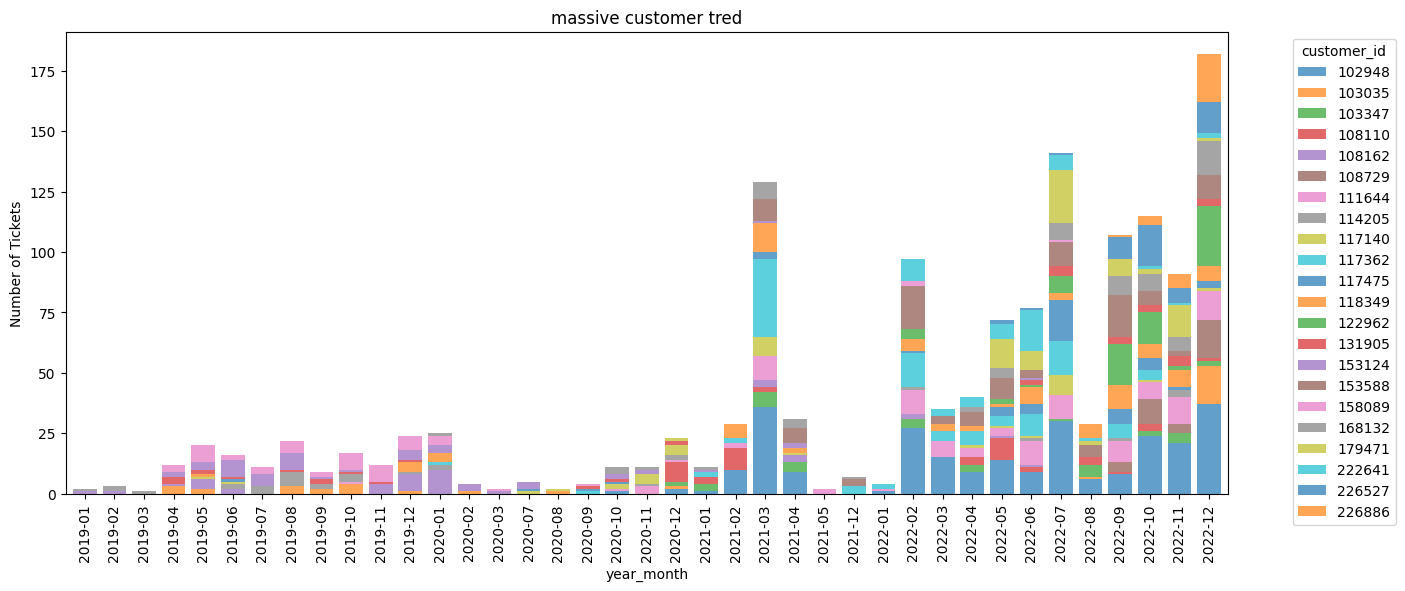

In [ ]:
#biểu đồ bar cột chồng lên nhau
df_customer_massive_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)

# Set the title and labels
plt.title('massive customer tred')
# ax.set_xlabel('Month')
plt.ylabel('Number of Tickets')

# Add a legend
plt.legend(title='customer_id', loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()

**Kết luận: Số lượng vé của nhóm khách hàng mua nhiều này mua dàn trải không có gì bất thường. Không có hiện tượng spam vé mua đi bán lại**

### Masive Promotion

In [ ]:
# Coi lại phân bổ promotion coi mỗi người là bao nhiêu

In [ ]:
df_customer_value['n_promo_dis']= df_customer_value['n_promotions'].apply(lambda x: 'more than 10' if x >= 10 else str(x))

In [ ]:
df_customer_value.head(2)

customer_id  n_total  n_failed  n_success  s_money  s_discount  n_days  \
0       100001        1         0        1.0     7.42        2.06     1.0   
1       100003        6         0        6.0    60.95        2.56     6.0   

   n_months  n_promotions  success_rate  promotion_rate  discount_rate  \
0       1.0           1.0           1.0        1.000000       0.277628   
1       6.0           1.0           1.0        0.166667       0.042002   

  n_order_dis n_promo_dis  
0         1.0         1.0  
1         6.0         1.0

In [ ]:
# đếm số người theo số lần nhận khuyến mãi
df_promo_dis = (
    df_customer_value.groupby('n_promo_dis')
    .agg(total_cus = ('customer_id','count'))
    .reset_index()
)

In [ ]:
df_promo_dis

n_promo_dis  total_cus
0            0.0      50498
1            1.0      61334
2            2.0       6264
3            3.0       1042
4            4.0        230
5            5.0         74
6            6.0         19
7            7.0         10
8            8.0          2
9            9.0          2
10  more than 10          2

Text(0.5, 1.0, '#customer of each group')

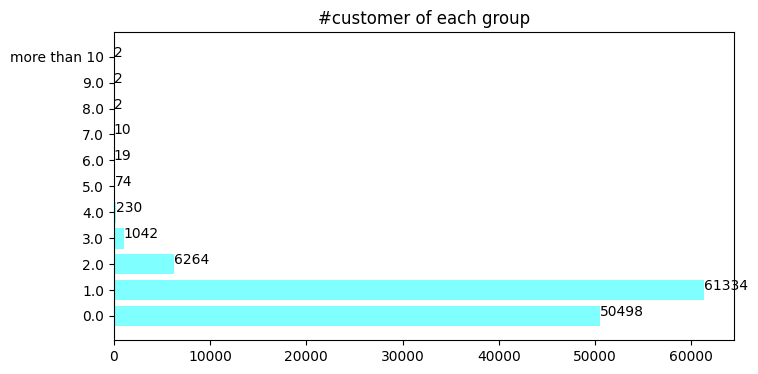

In [ ]:
# Vẽ biểu đồ xem phân bố khách hàng nhận khuyến mãi
plt.figure(figsize=(8,4))
plt.barh(df_promo_dis['n_promo_dis'],df_promo_dis['total_cus'],color= 'aqua',alpha= 0.5)
for index,value in enumerate(df_promo_dis['total_cus']):
  plt.text(value,index,str(value))
plt.title('#customer of each group')

>> Ta có khoảng 70% số khách hàng có sử dụng khuyến mãi.
>> Trong 70% đó ta có 90% người sử dụng khuyến mãi 1 lần
>>> 1. Khách hàng đến 1 lần rồi thôi
>>> 2. Các chương trình promotion chỉ dùng cho 1 người dùng 1 lần (new customer)??? => verify lại với team product, MKT

In [ ]:
#Vậy loại khuyến mãi mà khách hàng đang dùng là gì

In [ ]:
df_join_all.head(2)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  month  \
0  Order successful     unknown  iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown     browser  website     12174   33      7   

  name_day  hour year_month os_version       type  
0   Friday    17    2022-07        ios  promotion  
1   Friday    20    2022-07    browser  promotion

In [ ]:
#Đánh giá mã khuyến mãi mà khách hàng dùng
df_type_group = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('campaign_type')
    .agg(total_ticket=('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_type_group
## Ta thấy trong nhóm nhận khuyến mãi thì có khoảng 90% số vé là loại khuyến mãi direct discount,
## nhưng ta vẫn chưa xác định được tỏng mỗi nhóm khách KM1 lần,KM2 lần,... sử dụng loại hình khuyến mãi nào và tỷ trọng mỗi nhóm là bao nhiêu %
## cần phân tích sâu từng nhóm

campaign_type  total_ticket
0  direct discount         68449
1     reward point          3150
2          voucher          6924

In [ ]:
## Tính tỷ lệ loại khuyến mãi chi tiết cho từng nhóm khách hàng(nhóm 1KM,nhóm 2KM,...)

In [ ]:
## Tính mỗi người khách hàng có bao nhiêu promotion
df_n_success=(
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('customer_id')
    .agg(n_promotions = ('ticket_id','count'))
    .reset_index()
)

In [ ]:
df_n_success.count()

customer_id     68979
n_promotions    68979
dtype: int64

In [ ]:
df_n_pivot =(
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .pivot_table(index = 'customer_id',columns='campaign_type',aggfunc = 'count',values='ticket_id')
    .reset_index()
)

In [ ]:
df_n_pivot

campaign_type  customer_id  direct discount  reward point  voucher
0                   100001              NaN           NaN      1.0
1                   100003              1.0           NaN      NaN
2                   100005              NaN           NaN      1.0
3                   100007              1.0           NaN      NaN
4                   100009              7.0           NaN      NaN
...                    ...              ...           ...      ...
68974               231393              NaN           NaN      1.0
68975               231395              1.0           NaN      NaN
68976               231397              NaN           NaN      1.0
68977               231398              NaN           NaN      1.0
68978               231399              NaN           NaN      1.0

[68979 rows x 4 columns]

In [ ]:
df_n_join =(
    pd.merge(df_n_success,df_n_pivot,how='inner',on='customer_id')
    .groupby('n_promotions')
    .agg(n_cus=('customer_id','count'),
         n_voucher=('voucher','sum'),
         n_direct_discount=('direct discount','sum'),
         n_reward_point=('reward point','sum')
          )
    .reset_index()
)

In [ ]:
df_n_join

n_promotions  n_cus  n_voucher  n_direct_discount  n_reward_point
0              1  61334     5358.0            53098.0          2878.0
1              2   6264     1091.0            11222.0           215.0
2              3   1042      293.0             2788.0            45.0
3              4    230       87.0              827.0             6.0
4              5     74       43.0              323.0             4.0
5              6     19       12.0              102.0             0.0
6              7     10       14.0               54.0             2.0
7              8      2        2.0               14.0             0.0
8              9      2        6.0               12.0             0.0
9             10      1        1.0                9.0             0.0
10            17      1       17.0                0.0             0.0

In [ ]:
df_n_join['total']=df_n_join.iloc[:,2:].sum(axis=1)

In [ ]:
for i in df_n_join.columns[2:5]:
  df_n_join[i + '_pct']=df_n_join[i]/df_n_join['total']


In [ ]:
df_n_join

n_promotions  n_cus  n_voucher  n_direct_discount  n_reward_point  \
0              1  61334     5358.0            53098.0          2878.0   
1              2   6264     1091.0            11222.0           215.0   
2              3   1042      293.0             2788.0            45.0   
3              4    230       87.0              827.0             6.0   
4              5     74       43.0              323.0             4.0   
5              6     19       12.0              102.0             0.0   
6              7     10       14.0               54.0             2.0   
7              8      2        2.0               14.0             0.0   
8              9      2        6.0               12.0             0.0   
9             10      1        1.0                9.0             0.0   
10            17      1       17.0                0.0             0.0   

      total  n_voucher_pct  n_direct_discount_pct  n_reward_point_pct  
0   61334.0       0.087358               0.865719            0.046923  
1   12528.0       0.087085               0.895754            0.017162  
2    3126.0       0.093730               0.891875            0.014395  
3     920.0       0.094565               0.898913            0.006522  
4     370.0       0.116216               0.872973            0.010811  
5     114.0       0.105263               0.894737            0.000000  
6      70.0       0.200000               0.771429            0.028571  
7      16.0       0.125000               0.875000            0.000000  
8      18.0       0.333333               0.666667            0.000000  
9      10.0       0.100000               0.900000            0.000000  
10     17.0       1.000000               0.000000            0.000000

In [ ]:
format_dict={'total':'{:.0f}','n_voucher_pct':'{:.0%}','n_direct_discount_pct':'{:.0%}','n_reward_point_pct':'{:.0%}'}

In [ ]:
#Tô màu (heat map) cho table
(
    df_n_join
    .drop(columns=['n_voucher','n_direct_discount','n_reward_point'])
    .style
    .format(format_dict)
    .background_gradient(subset=['n_voucher_pct','n_direct_discount_pct','n_reward_point_pct'],cmap='PuBu')
    .background_gradient(subset=['total'],cmap='YlGn')
)

Tất cả các nhóm khách hàng theo số lượng promotion đều sử dụng loại khuyến mãi direct_discount rất nhiều (tỷ lệ có thay đổi một ít thôi). Nên là direct discount vẫn là best option của chúng ta.
>>> Họ sử dụng khuyến mãi rồi họ có quay trở lại hay không?? Đánh giá thêm về Retention của KH

## 3.5 Customer Retention - Cohort Analysis

In [ ]:
# Dựa vào lần đầu chuyển đổi khách hàng: lần đầu tiên thanh toán, mua hàng, cài app,..

In [ ]:
from operator import attrgetter # attrgetter return an attribute from an object
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
#Bước 1: Tính toán các thông tin: Cohort (first_month),current month, subsequent month
df_selected_time = df_join_all[(df_join_all['time'] < '2020-01-01') & (df_join_all['status_id'] == 1)]
#Tạo cột first_month
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
# transform() method allows you to execute a function for each value of the DataFrame.
# period() method represents a period of time. Ý nghĩa của code trên period('M') là trả về tháng hiện tại của khoảng thời gian
# ý nghĩa của code trên là groupby theo từng KH lấy cột time chọn ra min_time(lầy đầu) của từng KH

df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
# giống ý nghĩa và cách khác như cột year_month

df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))
#Subsequent: khoảng cách của những giao dịch hiện tại với giao dịch đầu tiên

<ipython-input-397-f6becddc947a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-397-f6becddc947a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-397-f6becddc947a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [ ]:
df_selected_time.head(5)

ticket_id  customer_id paying_method  \
11327  9e3e753f70aede1c6dcc577ce563eef1       100009   credit card   
11328  74a0ac9b7c60d2e7d3664686c3342c00       101892  money in app   
11329  4a653fb01188cfaefe7e3731de2648de       105574   credit card   
11332  f075d68aa14bc424e3d9ca7904f900a5       111681   credit card   
11333  747efd023e43617ca96e127c8af625b8       116896  money in app   

       theater_name                     device_number  original_price  \
11327          74.0  3cac5d2e2eb76525aecea5c2ab46b3d9            9.07   
11328          79.0  fe9a5c91e224f005a8be1c62923548d8            9.07   
11329          43.0  99b47df3cdeecb3dec4da6c18b916dd0            9.07   
11332         123.0  a43fb711603d5f2be7001397d280e413            8.66   
11333          72.0  ac219f148fe5a9653b48ce64b41625b7            6.19   

       discount_value  final_price                    time  status_id  \
11327            2.56         6.51 2019-11-09 16:19:41.008          1   
11328            2.56         6.51 2019-11-16 16:35:02.953          1   
11329            2.56         6.51 2019-11-09 18:10:13.461          1   
11332            2.10         6.56 2019-11-16 22:02:42.851          1   
11333            0.00         6.19 2019-11-13 17:32:32.892          1   

       campaign_id    movie_name  usergender        dob    campaign_type  \
11327        25680  Doctor Sleep        Male 1989-02-25  direct discount   
11328        25690  Doctor Sleep      Female 1986-10-19  direct discount   
11329        25680  Doctor Sleep        Male 1935-01-01  direct discount   
11332        25690  Doctor Sleep  Not verify 1970-01-01  direct discount   
11333            0  Doctor Sleep        Male 1990-08-30          unknown   

            description error_group             model platform  age_days  age  \
11327  Order successful     unknown        iPhone10,2   mobile     13008   35   
11328  Order successful     unknown  Samsung SM-N935F   mobile     13868   37   
11329  Order successful     unknown         iPhone9,2   mobile     32787   89   
11332  Order successful     unknown      HTC HTC_U-3u   mobile     20003   54   
11333  Order successful     unknown    OnePlus HD1900   mobile     12457   34   

       month   name_day  hour year_month       os_version           type  \
11327     11   Saturday    16    2019-11              ios      promotion   
11328     11   Saturday    16    2019-11  android & other      promotion   
11329     11   Saturday    18    2019-11              ios      promotion   
11332     11   Saturday    22    2019-11  android & other      promotion   
11333     11  Wednesday    17    2019-11  android & other  non-promotion   

      first_month current_month  subsequent_month  
11327     2019-04       2019-11                 7  
11328     2019-08       2019-11                 3  
11329     2019-11       2019-11                 0  
11332     2019-11       2019-11                 0  
11333     2019-11       2019-11                 0

In [ ]:
# Bước 2: Groupby theo Cohort
df_cohort = (
    df_selected_time
    .groupby(['first_month','current_month','subsequent_month'])
    .agg(n_customers = ('customer_id','nunique'))
    .reset_index(drop = False)
)

In [ ]:
df_cohort.head(10) #pivot kết quả này

first_month current_month  subsequent_month  n_customers
0     2019-01       2019-01                 0         1348
1     2019-01       2019-02                 1           50
2     2019-01       2019-03                 2           35
3     2019-01       2019-04                 3           26
4     2019-01       2019-05                 4           25
5     2019-01       2019-06                 5           33
6     2019-01       2019-07                 6           36
7     2019-01       2019-08                 7           29
8     2019-01       2019-09                 8           18
9     2019-01       2019-10                 9           35

In [ ]:
df_cohort_pivot = (
    df_cohort
    .pivot_table(index='first_month',columns='subsequent_month',values='n_customers')
)

In [ ]:
df_cohort_pivot # bước tiếp theo chuyển kết quả về dạng % và visual table

subsequent_month      0      1      2      3      4      5     6     7     8   \
first_month                                                                     
2019-01           1348.0   50.0   35.0   26.0   25.0   33.0  36.0  29.0  18.0   
2019-02           1293.0   58.0   88.0   64.0   78.0   50.0  58.0  30.0  46.0   
2019-03            745.0   51.0   48.0   49.0   33.0   33.0  30.0  34.0  23.0   
2019-04           2922.0  101.0  103.0   87.0   92.0   66.0  96.0  63.0  42.0   
2019-05           3226.0  145.0  118.0  129.0   90.0   93.0  90.0  62.0   NaN   
2019-06           3062.0  131.0  151.0   98.0  133.0  114.0  63.0   NaN   NaN   
2019-07           2611.0  121.0   79.0   99.0   78.0   40.0   NaN   NaN   NaN   
2019-08           3735.0  112.0  155.0  106.0   64.0    NaN   NaN   NaN   NaN   
2019-09           2169.0  117.0   67.0   39.0    NaN    NaN   NaN   NaN   NaN   
2019-10           3364.0  137.0   71.0    NaN    NaN    NaN   NaN   NaN   NaN   
2019-11           1522.0   48.0    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
2019-12            834.0    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   

subsequent_month    9     10    11  
first_month                         
2019-01           35.0  21.0  20.0  
2019-02           29.0  35.0   NaN  
2019-03           14.0   NaN   NaN  
2019-04            NaN   NaN   NaN  
2019-05            NaN   NaN   NaN  
2019-06            NaN   NaN   NaN  
2019-07            NaN   NaN   NaN  
2019-08            NaN   NaN   NaN  
2019-09            NaN   NaN   NaN  
2019-10            NaN   NaN   NaN  
2019-11            NaN   NaN   NaN  
2019-12            NaN   NaN   NaN

In [ ]:
# chuyển về %
cohort_size = df_cohort_pivot.iloc[:,0] #xác định mẫu
retention_matrix = df_cohort_pivot.divide(cohort_size,axis = 0)
# divide() struction: get Floating division(chia) of dataframe and other_element-wise (theo từng phần tử)
# ý nghĩa code: retention_matrix = df_cohort_pivot(từng cột,hàng tương ứng) chia cho cohort_size(mẫu) theo hàng ngang

In [ ]:
cohort_size

first_month
2019-01    1348.0
2019-02    1293.0
2019-03     745.0
2019-04    2922.0
2019-05    3226.0
2019-06    3062.0
2019-07    2611.0
2019-08    3735.0
2019-09    2169.0
2019-10    3364.0
2019-11    1522.0
2019-12     834.0
Freq: M, Name: 0, dtype: float64

In [ ]:
retention_matrix

subsequent_month   0         1         2         3         4         5   \
first_month                                                               
2019-01           1.0  0.037092  0.025964  0.019288  0.018546  0.024481   
2019-02           1.0  0.044857  0.068059  0.049497  0.060325  0.038670   
2019-03           1.0  0.068456  0.064430  0.065772  0.044295  0.044295   
2019-04           1.0  0.034565  0.035250  0.029774  0.031485  0.022587   
2019-05           1.0  0.044947  0.036578  0.039988  0.027898  0.028828   
2019-06           1.0  0.042782  0.049314  0.032005  0.043436  0.037231   
2019-07           1.0  0.046342  0.030257  0.037917  0.029874  0.015320   
2019-08           1.0  0.029987  0.041499  0.028380  0.017135       NaN   
2019-09           1.0  0.053942  0.030890  0.017981       NaN       NaN   
2019-10           1.0  0.040725  0.021106       NaN       NaN       NaN   
2019-11           1.0  0.031537       NaN       NaN       NaN       NaN   
2019-12           1.0       NaN       NaN       NaN       NaN       NaN   

subsequent_month        6         7         8         9         10        11  
first_month                                                                   
2019-01           0.026706  0.021513  0.013353  0.025964  0.015579  0.014837  
2019-02           0.044857  0.023202  0.035576  0.022428  0.027069       NaN  
2019-03           0.040268  0.045638  0.030872  0.018792       NaN       NaN  
2019-04           0.032854  0.021561  0.014374       NaN       NaN       NaN  
2019-05           0.027898  0.019219       NaN       NaN       NaN       NaN  
2019-06           0.020575       NaN       NaN       NaN       NaN       NaN  
2019-07                NaN       NaN       NaN       NaN       NaN       NaN  
2019-08                NaN       NaN       NaN       NaN       NaN       NaN  
2019-09                NaN       NaN       NaN       NaN       NaN       NaN  
2019-10                NaN       NaN       NaN       NaN       NaN       NaN  
2019-11                NaN       NaN       NaN       NaN       NaN       NaN  
2019-12                NaN       NaN       NaN       NaN       NaN       NaN

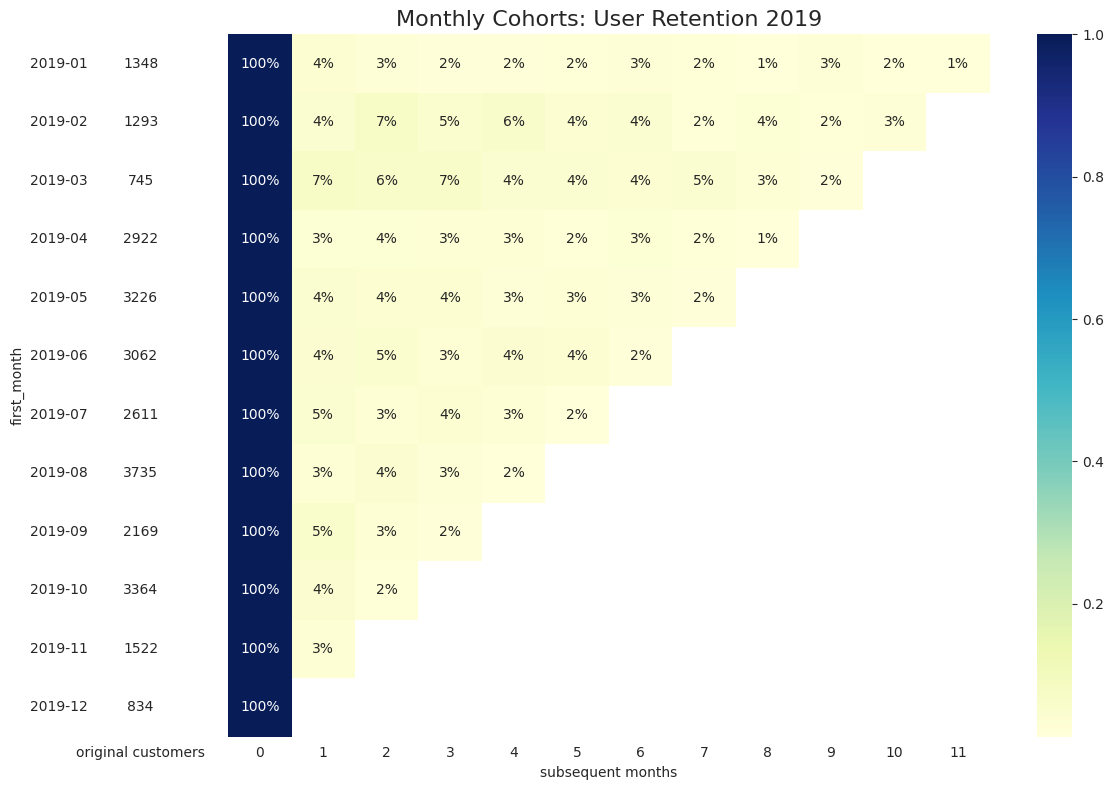

In [ ]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"): #sns seaborn library là một thư viện để visualizations giống với matplotlib
# lấy ra thư viện seaborn axes_style('white') nghĩa là lấy cái nền màu trắng
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
# khai báo subplots 1 dòng 2 cột là có 2 biểu đồ, sharey=True là dùng chung trục y
# gridspec_kw={'width_ratios': [1, 11]} là khai báo tỷ lệ cho biểu đồ, 1 là cho biểu đồ thứ 1, 11 là cho biểu đồ thứ 2 tổng là 12(figsize)

    # retention matrix (biểu đồ thứ nhất) heatmap là biểu đồ nhiệt
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(), #mask là che lại, nghĩa là chỗ nào NULL thì không cho hiển thị ra
                annot=True, #annot=True nghĩa là show ra values của từng ô
                fmt='.0%', # fmt là format nó về chữ số thập phân thứ 0
                cmap='YlGnBu',#cmap là bảng màu
                ax=ax[1]) #lấy trục x là biểu đồ thứ nhất
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size (biểu đồ thứ hai)
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'}) #rename đổi tên cột
    white_cmap = mcolors.ListedColormap(['white']) #lấy màu trắng
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

In [ ]:
#chạy tương tự năm 2022 (BT)

In [ ]:
df_selected_time = df_join_all[(df_join_all['time'] > '2022-01-01') & (df_join_all['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month']=df_selected_time['time'].dt.to_period('M')
# df_join_all['year_month'] = pd.to_datetime(df_join_all['time']).dt.strftime('%Y-%m')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

<ipython-input-408-a274f17471e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-408-a274f17471e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month']=df_selected_time['time'].dt.to_period('M')
<ipython-input-408-a274f17471e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
df_selected_time.head(5)

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   
2  1fdbeb7eceba8a27d9d985b5b70c219a       100596  money in app          56.0   
3  7715c9955866bd296b98543412839abd       100852  bank account         119.0   
4  776efd7bda0b715084430e6385f67746       100965  money in app         107.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   
2  69cf9244654949047f006e441fa7a8a7           10.31            2.31   
3  879ed11af9d6d2b5cda4d299590735a7           27.75            1.03   
4  0a233600d993a02cc1d39fb0d87fc7de            4.33            1.03   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   
2         8.00 2022-07-30 11:16:55.483          1            0   
3        26.72 2022-07-04 22:33:07.458          1        85940   
4         3.30 2022-07-03 18:41:45.098          1        85940   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   
2  Thor: Love And Thunder       Male 1989-05-18          unknown   
3  Thor: Love And Thunder       Male 1997-08-31  direct discount   
4  Thor: Love And Thunder       Male 1988-09-20  direct discount   

        description error_group        model platform  age_days  age  month  \
0  Order successful     unknown   iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown      browser  website     12174   33      7   
2  Order successful     unknown      unknown   mobile     12926   35      7   
3  Order successful     unknown  devicemodel   mobile      9899   27      7   
4  Order successful     unknown  devicemodel   mobile     13166   36      7   

   name_day  hour year_month os_version           type first_month  \
0    Friday    17    2022-07        ios      promotion     2022-07   
1    Friday    20    2022-07    browser      promotion     2022-07   
2  Saturday    11    2022-07    unknown  non-promotion     2022-07   
3    Monday    22    2022-07    unknown      promotion     2022-07   
4    Sunday    18    2022-07    unknown      promotion     2022-07   

  current_month  subsequent_month  
0       2022-07                 0  
1       2022-07                 0  
2       2022-07                 0  
3       2022-07                 0  
4       2022-07                 0

In [ ]:
# Bước 2: Groupby theo Cohort
df_cohort = (
    df_selected_time
    .groupby(['first_month','current_month','subsequent_month'])
    .agg(n_customers = ('customer_id','nunique'))
    .reset_index(drop= False)
)


In [ ]:
df_cohort.head(10) #pivot df_cohort

first_month current_month  subsequent_month  n_customers
0     2022-01       2022-01                 0          474
1     2022-01       2022-02                 1           31
2     2022-01       2022-03                 2           24
3     2022-01       2022-04                 3           25
4     2022-01       2022-05                 4           30
5     2022-01       2022-06                 5           23
6     2022-01       2022-07                 6           28
7     2022-01       2022-08                 7           13
8     2022-01       2022-09                 8           20
9     2022-01       2022-10                 9           13

In [ ]:
df_cohort_pivot = (
    df_cohort
    .pivot_table(index='first_month',columns='subsequent_month',values='n_customers')
)

In [ ]:
df_cohort_pivot

subsequent_month       0      1      2      3      4      5      6      7   \
first_month                                                                  
2022-01             474.0   31.0   24.0   25.0   30.0   23.0   28.0   13.0   
2022-02            3212.0   94.0   99.0  160.0  120.0  161.0   77.0   90.0   
2022-03            3675.0  117.0  157.0  111.0  188.0   83.0  106.0  115.0   
2022-04            4240.0  218.0  126.0  204.0   84.0  109.0  126.0  127.0   
2022-05           10365.0  324.0  488.0  143.0  207.0  263.0  253.0  214.0   
2022-06            6511.0  307.0  139.0  166.0  157.0  141.0  143.0    NaN   
2022-07           13630.0  252.0  303.0  344.0  295.0  270.0    NaN    NaN   
2022-08            4069.0  139.0  135.0  110.0  103.0    NaN    NaN    NaN   
2022-09            5843.0  194.0  155.0  143.0    NaN    NaN    NaN    NaN   
2022-10            7184.0  230.0  179.0    NaN    NaN    NaN    NaN    NaN   
2022-11            5841.0  188.0    NaN    NaN    NaN    NaN    NaN    NaN   
2022-12            6212.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

subsequent_month     8     9     10    11  
first_month                                
2022-01            20.0  13.0  20.0  25.0  
2022-02           117.0  68.0  81.0   NaN  
2022-03           110.0  90.0   NaN   NaN  
2022-04            99.0   NaN   NaN   NaN  
2022-05             NaN   NaN   NaN   NaN  
2022-06             NaN   NaN   NaN   NaN  
2022-07             NaN   NaN   NaN   NaN  
2022-08             NaN   NaN   NaN   NaN  
2022-09             NaN   NaN   NaN   NaN  
2022-10             NaN   NaN   NaN   NaN  
2022-11             NaN   NaN   NaN   NaN  
2022-12             NaN   NaN   NaN   NaN

In [ ]:
#tính % cho các tháng
cohort_size=df_cohort_pivot.iloc[:,0] #xác định mẫu
retention_matrix = df_cohort_pivot.divide(cohort_size,axis = 0)


In [ ]:
cohort_size

first_month
2022-01      474.0
2022-02     3212.0
2022-03     3675.0
2022-04     4240.0
2022-05    10365.0
2022-06     6511.0
2022-07    13630.0
2022-08     4069.0
2022-09     5843.0
2022-10     7184.0
2022-11     5841.0
2022-12     6212.0
Freq: M, Name: 0, dtype: float64

In [ ]:
retention_matrix

subsequent_month   0         1         2         3         4         5   \
first_month                                                               
2022-01           1.0  0.065401  0.050633  0.052743  0.063291  0.048523   
2022-02           1.0  0.029265  0.030822  0.049813  0.037360  0.050125   
2022-03           1.0  0.031837  0.042721  0.030204  0.051156  0.022585   
2022-04           1.0  0.051415  0.029717  0.048113  0.019811  0.025708   
2022-05           1.0  0.031259  0.047082  0.013796  0.019971  0.025374   
2022-06           1.0  0.047151  0.021348  0.025495  0.024113  0.021656   
2022-07           1.0  0.018489  0.022230  0.025238  0.021643  0.019809   
2022-08           1.0  0.034161  0.033178  0.027034  0.025313       NaN   
2022-09           1.0  0.033202  0.026527  0.024474       NaN       NaN   
2022-10           1.0  0.032016  0.024916       NaN       NaN       NaN   
2022-11           1.0  0.032186       NaN       NaN       NaN       NaN   
2022-12           1.0       NaN       NaN       NaN       NaN       NaN   

subsequent_month        6         7         8         9         10        11  
first_month                                                                   
2022-01           0.059072  0.027426  0.042194  0.027426  0.042194  0.052743  
2022-02           0.023973  0.028020  0.036426  0.021171  0.025218       NaN  
2022-03           0.028844  0.031293  0.029932  0.024490       NaN       NaN  
2022-04           0.029717  0.029953  0.023349       NaN       NaN       NaN  
2022-05           0.024409  0.020646       NaN       NaN       NaN       NaN  
2022-06           0.021963       NaN       NaN       NaN       NaN       NaN  
2022-07                NaN       NaN       NaN       NaN       NaN       NaN  
2022-08                NaN       NaN       NaN       NaN       NaN       NaN  
2022-09                NaN       NaN       NaN       NaN       NaN       NaN  
2022-10                NaN       NaN       NaN       NaN       NaN       NaN  
2022-11                NaN       NaN       NaN       NaN       NaN       NaN  
2022-12                NaN       NaN       NaN       NaN       NaN       NaN

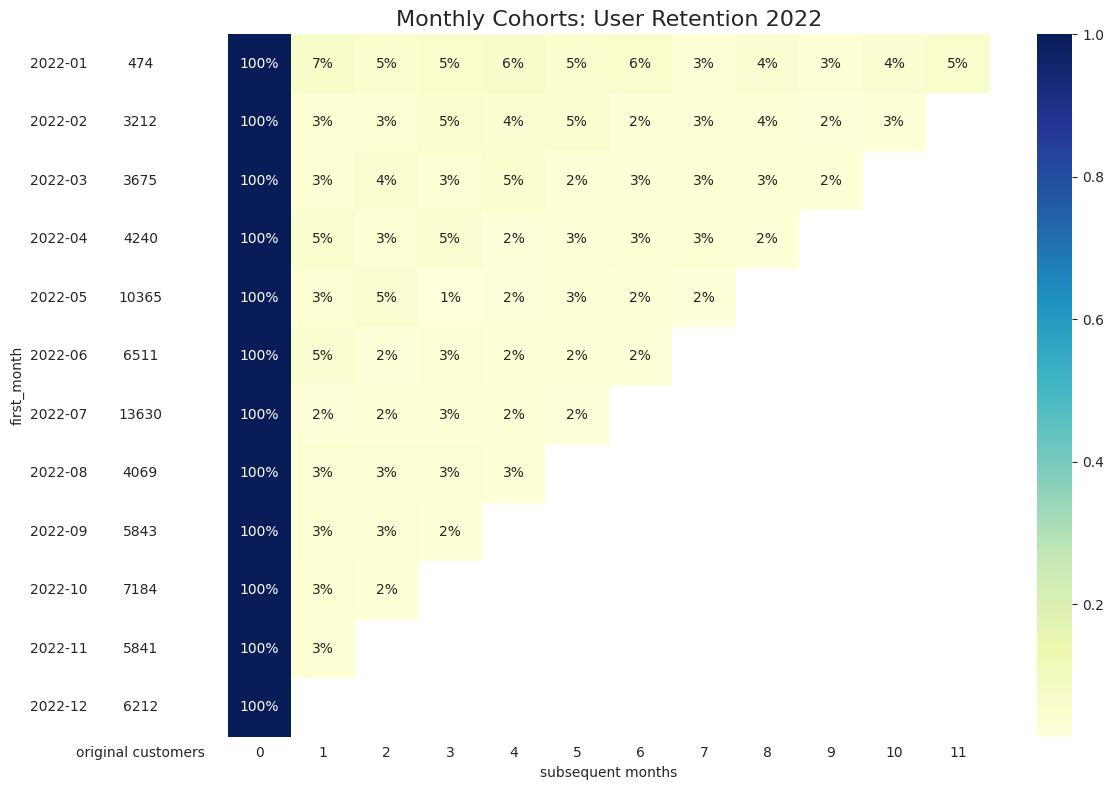

In [ ]:

# Vẽ biểu đồ cohort
with sns.axes_style("white"): #sns seaborn library là một thư viện để visualizations giống với matplotlib
# lấy ra thư viện seaborn axes_style('white') nghĩa là lấy cái nền màu trắng
    fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=True,gridspec_kw={'width_ratios': [1,11]}) #width_ratios: tỷ lệ chiều rộng
# khai báo subplots 1 dòng 2 cột là có 2 biểu đồ, sharey=True là dùng chung trục y
# gridspec_kw={'width_ratios': [1, 11]} là khai báo tỷ lệ cho biểu đồ, 1 là cho biểu đồ thứ 1, 11 là cho biểu đồ thứ 2 tổng là 12(figsize)

    # retention matrix (biểu đồ thứ nhất) heatmap là biểu đồ nhiệt
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(), #mask là che lại, nghĩa là chỗ nào NULL thì không cho hiển thị ra
                annot=True, #annot=True nghĩa là show ra values của từng ô #annot: nghĩa là ghi chú
                fmt='.0%', # fmt là format nó về chữ số thập phân thứ 0
                cmap='YlGnBu',#cmap là bảng màu
                ax=ax[1]) #lấy trục x là biểu đồ thứ nhất
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size (biểu đồ thứ hai)
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'}) #rename đổi tên cột
    white_cmap = mcolors.ListedColormap(['white']) #lấy màu trắng
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()


1. Retention 2019 và 2022 không có nhiều sự thay đổi, do thị trường phim mới hồi phục nên chưa có nhiều thời gian để công ty cải thiện
2. Hoặc là công ty chỉ mới đầu tư vào khách hàng mới thôi chưa có chính sách giữ chân khách hàng cũ
3. Retention thấp mặc dù tỷ lệ hưởng khuyến mãi promotion 60-65%?

### Compare: Retention of promotion customers & organic customers

In [ ]:
# By payment method
df_pie_promo = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['time'] > '2022-01-01')]
    .groupby('type')
    .agg(total_ticket=('customer_id','nunique'))
    .sort_values(by='total_ticket',ascending=True).reset_index()
)

In [ ]:
df_pie_promo

type  total_ticket
0  non-promotion         27672
1      promotion         47507

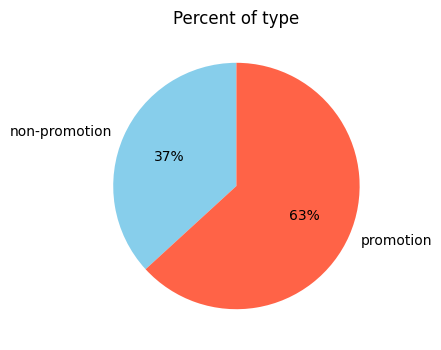

In [ ]:
#pie
plt.figure(figsize=(8,4))
plt.pie(df_pie_promo['total_ticket'],
        labels=df_pie_promo['type'],
        autopct='%1.0f%%',
        colors=df_pie_promo['type'].replace({'non-promotion':'skyblue','promotion':'tomato'}),
        startangle=90
        )
plt.title('Percent of type')
plt.show()

In [ ]:
# Phân biệt nhóm promotion và nhóm organic: dựa vào vé đầu tiên (first_order) có khuyến mãi hay không
# => để làm việc này ta cần đánh STT đơn hàng của từng người

In [ ]:
df_data_check=(
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['time'] > '2022-01-01')] [['customer_id','ticket_id','time','type']]
    .sort_values(by=['customer_id','time'])
)

In [ ]:
df_data_check

customer_id                         ticket_id                    time  \
66484        100003  34c4764b4afa000af4c33a525f20eace 2022-05-22 12:52:12.105   
10001        100004  1c4aa39842bfc83dbb5856c25a33d9cb 2022-12-20 06:26:21.373   
108794       100007  5565ba5e22475c7cce298a2bea470428 2022-03-21 17:57:18.460   
0            100009  4f5200dcdcf2396b8d50ff84bf423f32 2022-07-08 17:46:36.145   
5585         100009  0724203b5146b0ebae6e3678ed7eccde 2022-12-24 09:32:45.477   
...             ...                               ...                     ...   
7518         231393  92d8ee40d9c67d6735032d8b6967150a 2022-12-30 22:23:37.942   
8161         231395  5ff0423850f31354fc5825f7f1c1ec3e 2022-12-30 21:49:52.181   
133717       231397  65156cae3a601e35c266d6160b0600b4 2022-12-30 23:12:45.231   
133881       231398  53cbd4a121957face9e948c3c794384c 2022-12-31 12:24:25.127   
130535       231399  cca3b749b0ad575cf68aeeb4c4449154 2022-12-31 20:35:10.328   

                 type  row_number  
66484   non-promotion           1  
10001   non-promotion           1  
108794      promotion           1  
0           promotion           1  
5585        promotion           2  
...               ...         ...  
7518        promotion           1  
8161        promotion           1  
133717      promotion           1  
133881      promotion           1  
130535      promotion           1  

[83700 rows x 5 columns]

In [ ]:
# Đánh số thứ tự các vé của khách hàng
df_data_check['row_number'] = df_data_check.groupby('customer_id').cumcount() + 1

In [ ]:
# Số khách hàng có first_payment là promotion
df_data_check[(df_data_check['type'] == 'promotion') & (df_data_check['row_number'] == 1)] ['customer_id'].nunique()

46189

In [ ]:
46189/47507

0.9722567200623066

In [ ]:
# chúng ta có 97% khách hàng đến từ promotion trong nhóm khách hàng có tham gia promotion
# => Retention là bao nhiêu

In [ ]:
#groupby tạo ra df chỉ gồm các khách hàng promotion
df_first_promo_list = df_data_check[(df_data_check['type'] == 'promotion') & (df_data_check['row_number'] == 1)] ['customer_id']
df_first_promo_list.drop_duplicates(inplace=True)
df_first_promo_check = pd.merge(df_data_check,df_first_promo_list,how='inner',on='customer_id')

<ipython-input-437-5abe3db8197b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace=True)


In [ ]:
#tính xem trong nhóm KH promotion có bao nhiêu quay lại
(
    df_first_promo_check[ (df_first_promo_check['row_number'] == 2) ] ['customer_id'].nunique()
/
    df_first_promo_check['customer_id'].nunique()
)

0.1308969668102795

In [ ]:
# 13% KH quay lại kể từ lần đầu tham gia promotion (tỷ lệ chuyển đổi, giữ chân = 13%)

# => nhóm organic có khác biệt không ??

In [ ]:
list_first_non_promo = df_data_check[(df_data_check['type'] == 'non-promotion') & (df_data_check['row_number'] == 1)] ['customer_id']
list_first_non_promo.drop_duplicates(inplace=True)
df_first_non_promo_check = pd.merge(df_data_check,list_first_non_promo,how='inner',on='customer_id')
(
    df_first_non_promo_check[df_first_non_promo_check['row_number'] == 2]['customer_id'].nunique()
/
    df_first_non_promo_check['customer_id'].nunique()
)

<ipython-input-443-d436467d2d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_first_non_promo.drop_duplicates(inplace=True)


0.12195316551641601

In [ ]:
# Nhóm KH first_time có lần đầu là organic => tỷ lệ giữ chân = 12%

1. Chỉ có 13% khách hàng quay lại với nhóm lần đầu promotion và 12% khách hàng quay lại với nhóm non-promotion. Kết luận: không có sự khác biệt ở tỷ lệ giữ chân khách hàng ở cả 2 nhóm.

**=> Công ty đang chú trọng vào NEW CUSTOMERS nhưng chưa đẩy mạnh việc giữ chân và duy trì lượng khách hàng cũ.**

## 3.6 Payment success rate

### Overview

In [ ]:
# Kiểm tra lại success rate toàn thời gian

In [ ]:
def calculate_n_success(x):
  return(x==1).sum()

df_sr = (
    df_join_all
    .groupby('year_month')
    .agg(
        n_ords= ('ticket_id','count'), #total_ticket
        n_success = ('status_id',calculate_n_success)) #success_ticket
    .assign(success_rate= lambda x: (x['n_success'] / x['n_ords']) * 100) #tạo thêm 1 columns tính SR
    .reset_index()
)

In [ ]:
df_sr.head(2)

year_month  n_ords  n_success  success_rate
0    2019-01    2019       1359     67.310550
1    2019-02    1626       1427     87.761378

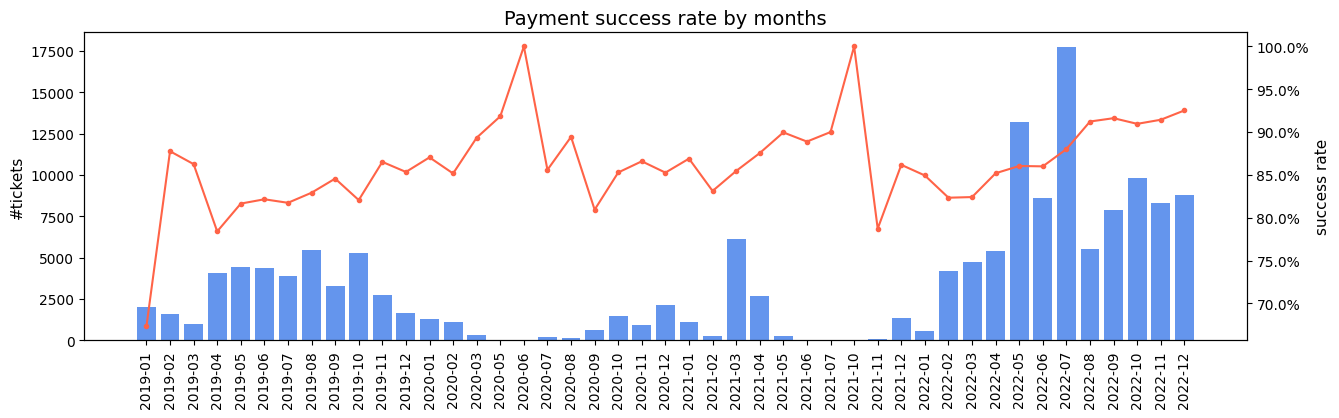

In [ ]:
# Vẽ biểu đồ cột và đường
from matplotlib.ticker import PercentFormatter # import định djang phần trăm trong matplotlib

fig,ax1=plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'],df_sr['n_ords'],color='cornflowerblue')
plt.ylabel('#tickets',fontsize=11)
plt.xticks(rotation='vertical') # giống =90

ax2=ax1.twinx() # nó sẽ hiểu lấy trục y đặt bên tay phải
ax2.plot(df_sr['year_month'],df_sr['success_rate'],color="tomato", marker="o", ms=3) #ms(markersize) là kích thước của marker
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate',fontsize=11)
plt.title('Payment success rate by months', fontsize=14)

plt.show()

**Overview:** Ta thấy hầu hết tỷ lệ giao dịch thành công của ta từ 60% trở lên. Có những thời điểm đạt 100%. Trong năm 2022, tỷ lệ giao dịch thành công giao động từ 75% đến 93%.

**=> Tổng quan là vậy giờ ta đào sâu vào các giao dịch không thành công**

### Error trend

In [ ]:
df_join_all.head(2)
# Ta thấy có cột description mô tả giao dịch đó và cột error_group nhóm lỗi của các giao dịch
# => Vậy ta groupby theo error_group để kiểm tra xe từng lỗi gì

ticket_id  customer_id paying_method  theater_name  \
0  4f5200dcdcf2396b8d50ff84bf423f32       100009  money in app          13.0   
1  07abbaf28c772692f0367ad992bb3184       100493  bank account         180.0   

                      device_number  original_price  discount_value  \
0  244764a57dbdeb8fe9b164847ad55183            9.90            2.10   
1  8fa83cf46284aafd6e5da6c96f7862b5            8.66            1.48   

   final_price                    time  status_id  campaign_id  \
0         7.80 2022-07-08 17:46:36.145          1        83330   
1         7.18 2022-07-15 20:44:09.952          1        83330   

               movie_name usergender        dob    campaign_type  \
0  Thor: Love And Thunder       Male 1989-02-25  direct discount   
1  Thor: Love And Thunder       Male 1991-06-09  direct discount   

        description error_group       model platform  age_days  age  month  \
0  Order successful     unknown  iPhone13,1   mobile     13008   35      7   
1  Order successful     unknown     browser  website     12174   33      7   

  name_day  hour year_month os_version       type  
0   Friday    17    2022-07        ios  promotion  
1   Friday    20    2022-07    browser  promotion

In [ ]:
# phân bố nhóm lỗi:
df_error_group = (
   df_join_all[df_join_all['description'] != 'Order successful']
   .groupby(['year_month','error_group'])
   .agg(n_ords = ('ticket_id','count'))
   .sort_values(by='year_month',ascending=True)
   .reset_index()
)

In [ ]:
df_error_group.head(5)

year_month error_group  n_ords
0    2019-01    customer     291
1    2019-01    external     369
2    2019-02    customer      66
3    2019-02    external     133
4    2019-03    customer      44

In [ ]:
df_error_group['error_group'].unique()

array(['customer', 'external', 'internal'], dtype=object)

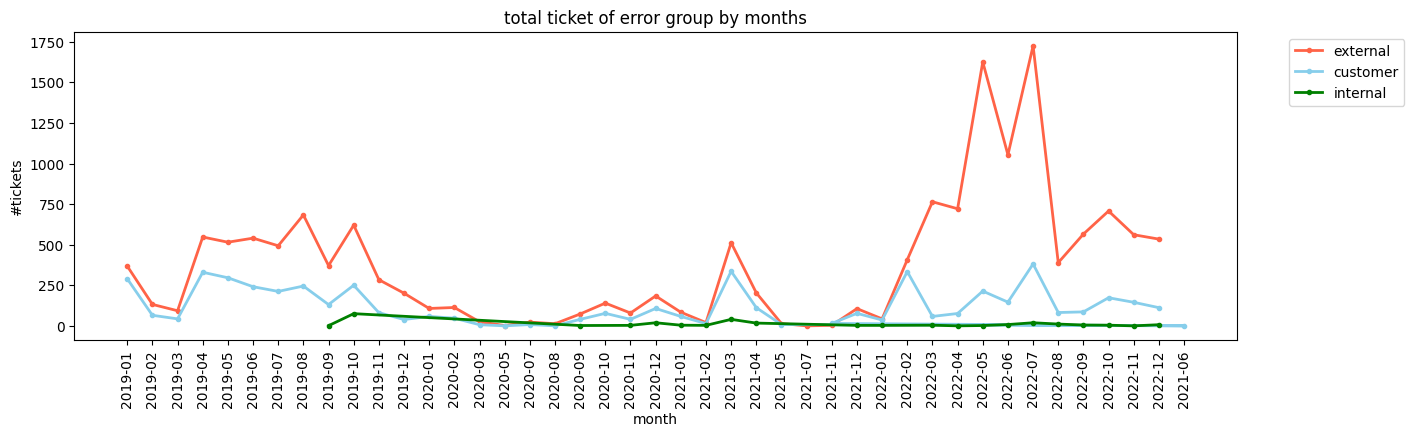

In [ ]:
#phân bố nhóm lỗi
#Thông thường vẽ line char có nhiều line ta nên khai báo nhóm màu cho từng line trước
error_color_pairs=[('external','tomato'),('customer','skyblue'),('internal','green')]

plt.figure(figsize=(15,4))

for error,color in error_color_pairs:
  df_error_line=df_error_group[df_error_group['error_group'] == error]
  plt.plot(df_error_line['year_month'],df_error_line['n_ords'], label=error, marker='o', color=color, linewidth=2, ms= 3)
#chạy vòng lặp for cho 3 line thay vì viết code lần lượt 3 line

plt.title('total ticket of error group by months')
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc = 'upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)

plt.show()

1. Ta thấy nhóm lỗi customer lúc nào cũng có.
2. Nhóm lỗi internal thì giao động ở mức thấp.
3. Nhóm lỗi external là nhóm lỗi giao động cao nhất và đặc biệt như kết luận tổng quan trên năm 2022 có xu hướng giao dịch thành công tăng cao và nhóm lỗi external cũng tăng vọt vào thời điểm đó.

**=> Vậy tìm hiểu thêm tại sao nhóm lỗi external lại tăng cao như vậy**

In [ ]:
# Nhóm lỗi external tăng đột biến trong năm 2022 ??

In [ ]:
#Phân bố mã lỗi
df_error = (
   df_join_all[df_join_all['description'] != 'Order successful']
   .groupby(['year_month','description'])
   .agg(n_ords = ('ticket_id','count'))
   .sort_values(by='year_month',ascending=True)
   .reset_index()
)

In [ ]:
df_error.head(10)

year_month  \
0    2019-01   
1    2019-01   
2    2019-01   
3    2019-01   
4    2019-01   
5    2019-02   
6    2019-02   
7    2019-02   
8    2019-02   
9    2019-02   

                                                                                    description  \
0  Insufficient funds in customer account. Please add more funds and try the transaction again.   
1                                                                    No response from your bank   
2         Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   
3                                                                      Payment failed from bank   
4                                                                               Payment overdue   
5  Insufficient funds in customer account. Please add more funds and try the transaction again.   
6                                                                    No response from your bank   
7         Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   
8                                                                      Payment failed from bank   
9                                                                               Payment overdue   

   n_ords  
0     217  
1     228  
2      56  
3     141  
4      18  
5      42  
6      67  
7      11  
8      66  
9      13

In [ ]:
df_error['description'].unique() # có tổng 7 mã lỗi

array(['Insufficient funds in customer account. Please add more funds and try the transaction again.',
       'No response from your bank',
       'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.',
       'Payment failed from bank', 'Payment overdue',
       'Transaction temporarily limited',
       'Need verify your account to continue'], dtype=object)

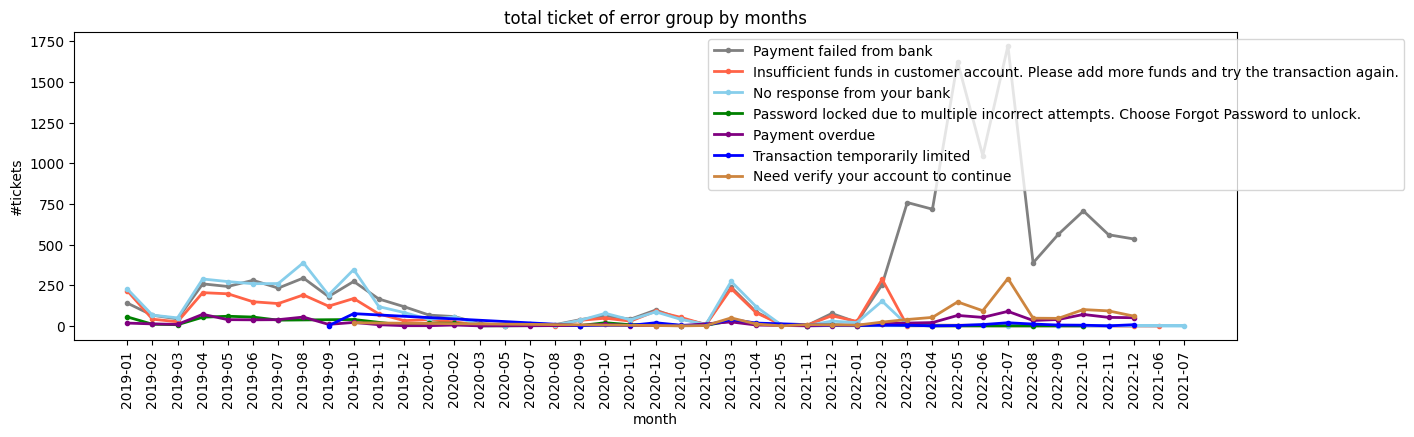

In [ ]:
#phân bố mã lỗi
#Thông thường vẽ line char có nhiều line ta nên khai báo nhóm màu cho từng line trước
error_color_pairs=[('Payment failed from bank','gray'),
 ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
  ('No response from your bank','skyblue'),('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
   ('Payment overdue','purple'),('Transaction temporarily limited','blue'),('Need verify your account to continue','peru')]

plt.figure(figsize=(15,4))

for error,color in error_color_pairs:
  df_error_line=df_error[df_error['description'] == error]
  plt.plot(df_error_line['year_month'],df_error_line['n_ords'], label=error, marker='o', color=color, linewidth=2, ms= 3)
#chạy vòng lặp for cho 7 line thay vì viết code lần lượt 7 line

plt.title('total ticket of error group by months')
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc = 'upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)

plt.show()

**=> Lỗi mà năm 2022 mắc nhiều nhất: payment failed from bank và need verify your account to continue ( lỗi do 1 bên thứ 3 external) và họ ngừng giao dịch luôn, những lỗi do bên thứ 3 này khó mà kiểm soát được**

#### SR=0% WHY and HOW ?

In [ ]:
df_customer_value.head(5)

customer_id  n_total  n_failed  n_success  s_money  s_discount  n_days  \
0       100001        1         0        1.0     7.42        2.06     1.0   
1       100003        6         0        6.0    60.95        2.56     6.0   
2       100004        1         0        1.0    32.25        0.00     1.0   
3       100005        1         0        1.0     9.49        2.06     1.0   
4       100006        1         0        1.0    12.37        0.00     1.0   

   n_months  n_promotions  success_rate  promotion_rate  discount_rate  \
0       1.0           1.0           1.0        1.000000       0.277628   
1       6.0           1.0           1.0        0.166667       0.042002   
2       1.0           0.0           1.0        0.000000       0.000000   
3       1.0           1.0           1.0        1.000000       0.217071   
4       1.0           0.0           1.0        0.000000       0.000000   

  n_order_dis n_promo_dis  
0         1.0         1.0  
1         6.0         1.0  
2         1.0         0.0  
3         1.0         1.0  
4         1.0         0.0

In [ ]:
list_sr_0=list(df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].unique())

In [ ]:
df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].nunique() # 13701 người RS=0%

13701

In [ ]:
def calculate_n_promotion(x):
  return(x=='promotion').sum()

df_sr_0_metric=(
    df_join_all[df_join_all['customer_id'].isin(list_sr_0)]
    .groupby('customer_id')
    .agg(n_orders=('ticket_id','count'),
         s_money=('original_price','sum'),
         s_discount=('discount_value','sum'),
         n_promotions=('type',calculate_n_promotion)
         )
    .reset_index()
)

In [ ]:
df_sr_0_metric['promotion_rate'] = df_sr_0_metric['n_promotions']/df_sr_0_metric['n_orders']
df_sr_0_metric['discount_rate'] = df_sr_0_metric['s_discount']/df_sr_0_metric['s_money']

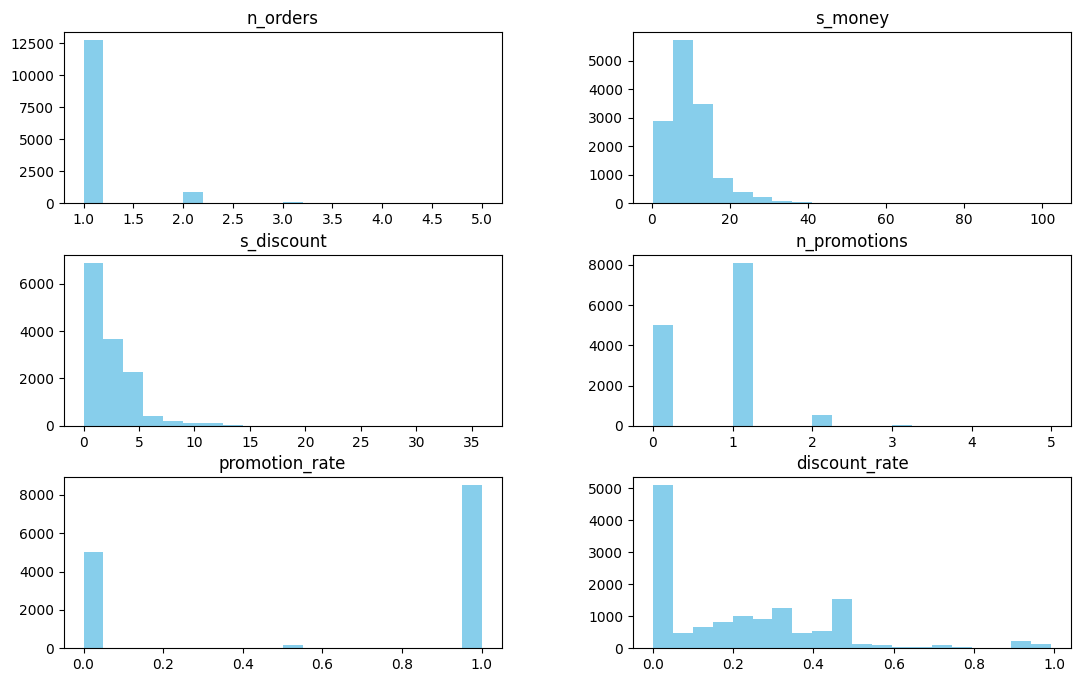

In [ ]:
df_sr_0_metric.iloc[:,1:].hist(figsize=(13,8), grid=False, color='skyblue', bins=20)
plt.show()

Kết luận:
1. nhóm người RS=0% họ không thử lại thất bại họ đi luôn (13701 người xem n_orders)
2. nhóm người này có khoảng hơn 8000 người hưởng khuyến mãi 1 lần

In [ ]:
# Họ bị lỗi gì vậy mà fail 1 lần rồi stop luôn. Họ không retry?

In [ ]:
#Detail error
#Phân tích nhóm lỗi

df_error_0 =(
    df_join_all[(df_join_all['status_id'] != 1) & (df_join_all['customer_id'].isin(list_sr_0))]
    .groupby(['year_month','description'])
    .agg(
        n_ords=('ticket_id','count'))
    .sort_values(by='year_month',ascending=True)
    .reset_index()
)

In [ ]:
df_error_0.head(10)

year_month  \
0    2019-01   
1    2019-01   
2    2019-01   
3    2019-01   
4    2019-01   
5    2019-02   
6    2019-02   
7    2019-02   
8    2019-02   
9    2019-02   

                                                                                    description  \
0  Insufficient funds in customer account. Please add more funds and try the transaction again.   
1                                                                    No response from your bank   
2         Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   
3                                                                      Payment failed from bank   
4                                                                               Payment overdue   
5  Insufficient funds in customer account. Please add more funds and try the transaction again.   
6                                                                    No response from your bank   
7         Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.   
8                                                                      Payment failed from bank   
9                                                                               Payment overdue   

   n_ords  
0     196  
1     206  
2      49  
3     114  
4      16  
5      31  
6      49  
7       7  
8      46  
9       7

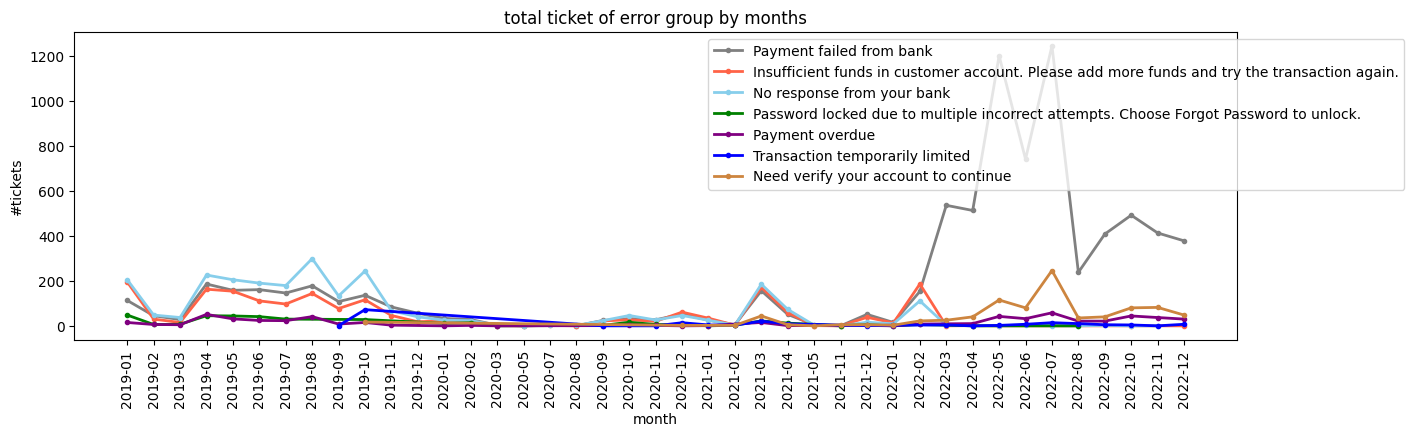

In [ ]:
#phân bố mã lỗi
#Thông thường vẽ line char có nhiều line ta nên khai báo nhóm màu cho từng line trước
error_color_pairs=[('Payment failed from bank','gray'),
 ('Insufficient funds in customer account. Please add more funds and try the transaction again.','tomato'),
  ('No response from your bank','skyblue'),('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.','green'),
   ('Payment overdue','purple'),('Transaction temporarily limited','blue'),('Need verify your account to continue','peru')]

plt.figure(figsize=(15,4))

for error,color in error_color_pairs:
  df_error_line=df_error_0[df_error_0['description'] == error]
  plt.plot(df_error_line['year_month'],df_error_line['n_ords'], label=error, marker='o', color=color, linewidth=2, ms= 3)
#chạy vòng lặp for cho 7 line thay vì viết code lần lượt 7 line

plt.title('total ticket of error group by months')
plt.xlabel('month')
plt.ylabel('#tickets')
plt.legend(loc = 'upper right',bbox_to_anchor=(1.15,1))
plt.xticks(rotation=90)

plt.show()

1. Nhóm bị lỗi này cũng gần như (giống) nhóm bị lỗi của toàn bộ KH (nhìn lại line char phía trên)
2. Lý do họ lỗi và stop là do:


*   Payment failed from bank
*   Need verify your account to continue
